In [37]:
#Lets import necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('pastel')

#Import Plotly
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Lets load the dataset
pd.set_option("display.max_rows",None)
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv",index_col=0)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [22]:
#Print Summary
print("Shape - - - - > ",data.shape)
print("Each Column and add type and its count ",'\n')
print(data.info())

Shape - - - - >  (569, 32)
Each Column and add type and its count  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  peri

In [23]:
#Drop Alert 1 : unnames:32 colums has all null. Safe to remove the column.

data=data.drop(['Unnamed: 32'],axis=1)
data.shape

(569, 31)

In [24]:
#Lets check for isnull
data.isna().sum().sum()

0

So, Here we dont have any nulls . So we are go to preoceed.

In [25]:
#Lets check for duplicated value
data.duplicated().sum()

0

So, Here we dont have any null values . so we are good to move foreward.

In [26]:
#Lets check for datatypes
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

So, Here most of the columns are in Float .  and we have only Diagnosis is in Object Data

In [27]:
#Lets check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [28]:
#Data Frame Statistics 
for col in data.columns:
    print(f"Description for {col} column:")
    print(data[col].describe())
    print("\n")

Description for diagnosis column:
count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object


Description for radius_mean column:
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


Description for texture_mean column:
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64


Description for perimeter_mean column:
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64


Description for area_mean column:
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782

# Observation 

        - We dont have anu null values .
        - Outliers in "perimeter_mean","area_mean","radius_se","texture_se","perimeter_se","area_se", "concavity_se ","radius_worst","texture_worst", "perimeter_worst","area_worst column""

In [30]:
#lets Check for Description of Object Columns
data.describe(include='O')

diagnosis
count        569
unique         2
top            B
freq         357

So, Here we can see that . We have two unique values in our Target Columns. Lets Moveforeward to Visualization part ..

# EDA -> Exploratory Data Analysis

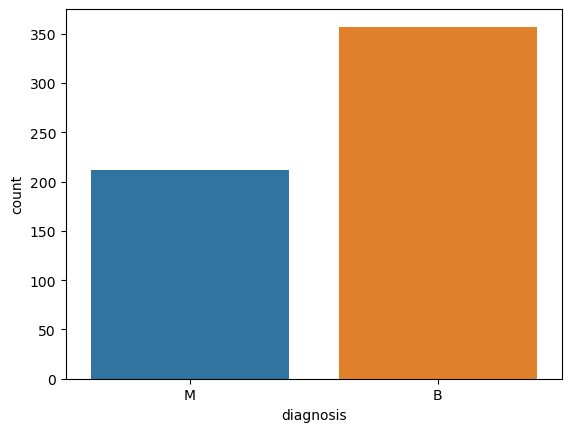

B    357
M    212
Name: diagnosis, dtype: int64

In [32]:
#Lets plot diagnosis 
sns.countplot(x='diagnosis',data=data)
plt.show()
data.diagnosis.value_counts()

May be i can feel this is ,it is a Imbalanced Dataset. 

In [33]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                
842302          17.990         10.38          122.80     1001.0   
842517          20.570         17.77          132.90     1326.0   
84300903        19.690         21.25          130.00     1203.0   
84348301        11.420         20.38           77.58      386.1   
84358402        20.290         14.34          135.10     1297.0   
843786          12.450         15.70           82.57      477.1   
844359          18.250         19.98          119.60     1040.0   
84458202        13.710         20.83           90.20      577.9   
844981          13.000         21.82           87.50      519.8   
84501001        12.460         24.04           83.97      475.9   
845636          16.020         23.24          102.70      797.8   
84610002        15.780         17.89          103.60      781.0   
846226          19.170         24.80          132.40     1123.0   
846381          15.850         23.95          103.70      782.7   
84667401        13.730         22.61           93.60      578.3   
84799002        14.540         27.54           96.73      658.8   
848406          14.680         20.13           94.74      684.5   
84862001        16.130         20.68          108.10      798.8   
849014          19.810         22.15          130.00     1260.0   
8510426         13.540         14.36           87.46      566.3   
8510653         13.080         15.71           85.63      520.0   
8510824          9.504         12.44           60.34      273.9   
8511133         15.340         14.26          102.50      704.4   
851509          21.160         23.04          137.20     1404.0   
852552          16.650         21.38          110.00      904.6   
852631          17.140         16.40          116.00      912.7   
852763          14.580         21.53           97.41      644.8   
852781          18.610         20.25          122.10     1094.0   
852973          15.300         25.27          102.40      732.4   
853201          17.570         15.05          115.00      955.1   
853401          18.630         25.11          124.80     1088.0   
853612          11.840         18.70           77.93      440.6   
85382601        17.020         23.98          112.80      899.3   
854002          19.270         26.47          127.90     1162.0   
854039          16.130         17.88          107.00      807.2   
854253          16.740         21.59          110.10      869.5   
854268          14.250         21.72           93.63      633.0   
854941          13.030         18.42           82.61      523.8   
855133          14.990         25.20           95.54      698.8   
855138          13.480         20.82           88.40      559.2   
855167          13.440         21.58           86.18      563.0   
855563          10.950         21.35           71.90      371.1   
855625          19.070         24.81          128.30     1104.0   
856106          13.280         20.28           87.32      545.2   
85638502        13.170         21.81           85.42      531.5   
857010          18.650         17.60          123.70     1076.0   
85713702         8.196         16.84           51.71      201.9   
85715           13.170         18.66           85.98      534.6   
857155          12.050         14.63           78.04      449.3   
857156          13.490         22.30           86.91      561.0   
857343          11.760         21.60           74.72      427.9   
857373          13.640         16.34           87.21      571.8   
857374          11.940         18.24           75.71      437.6   
857392          18.220         18.70          120.30     1033.0   
857438          15.100         22.02           97.26      712.8   
85759902        11.520         18.75           73.34      409.0   
857637          19.210         18.57          125.50     1152.0   
857793          14.710         21.59           95.55      

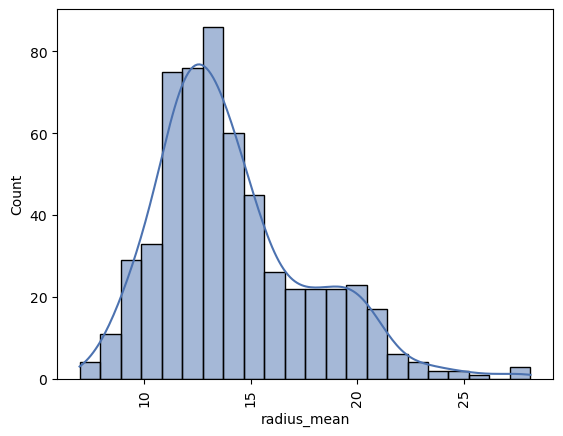

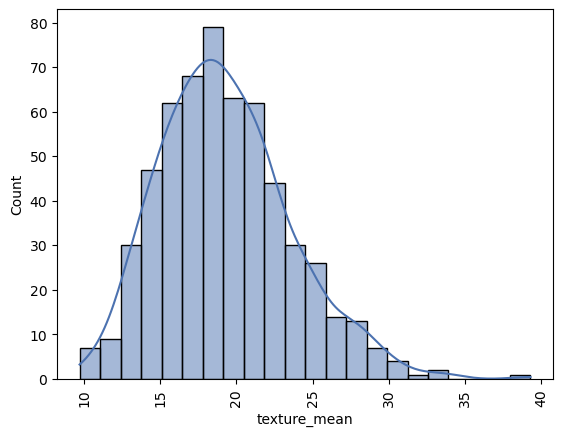

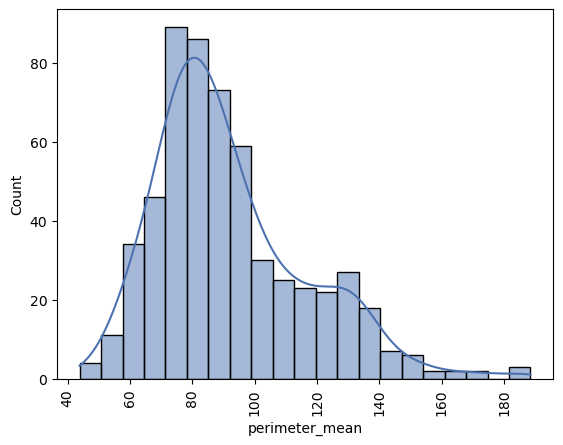

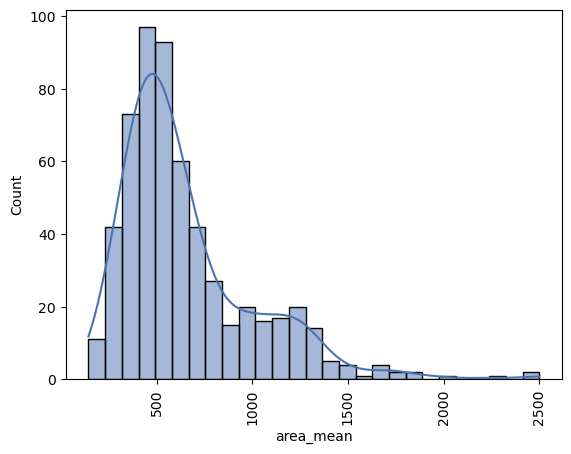

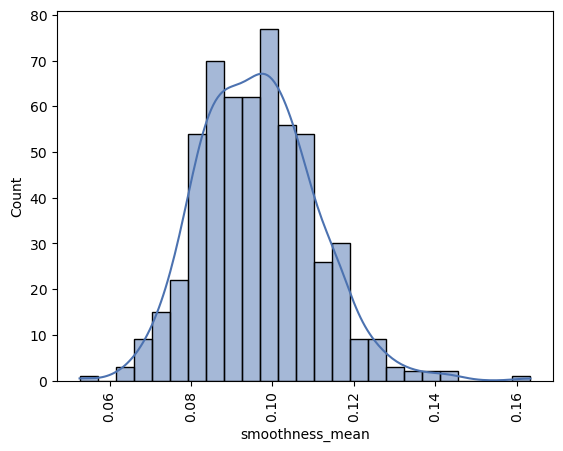

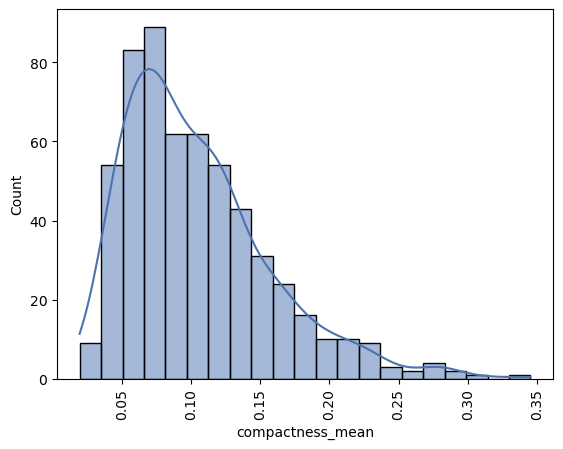

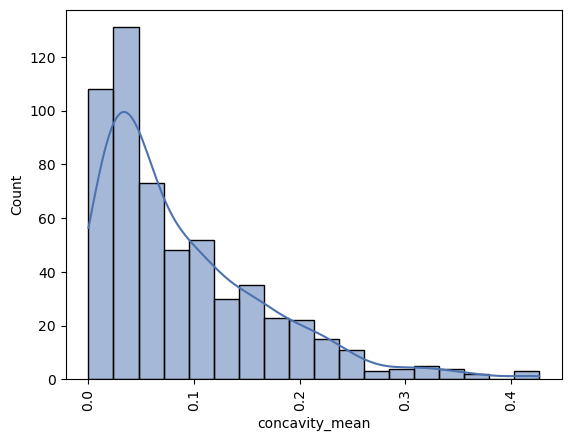

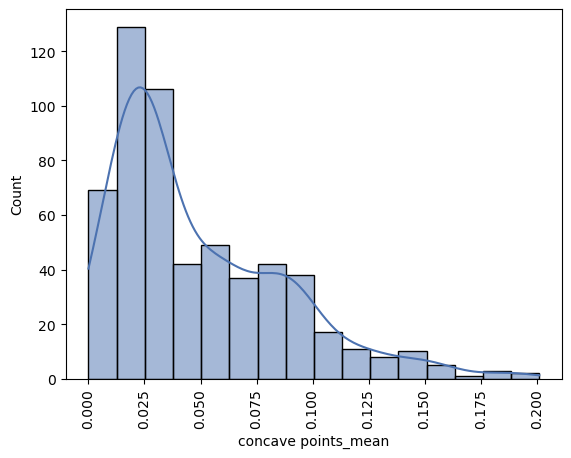

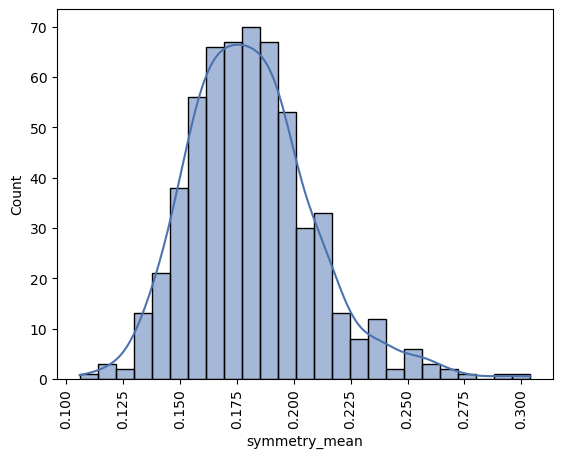

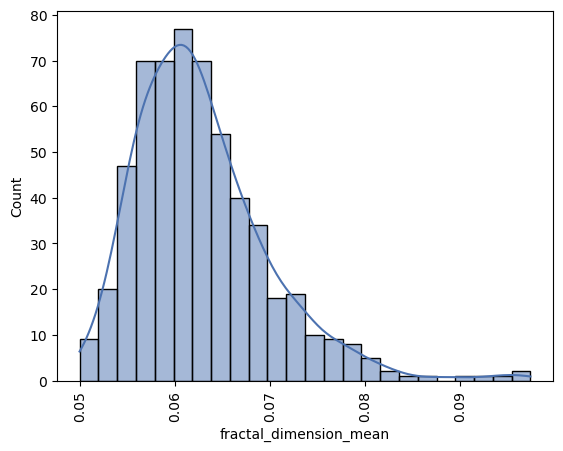

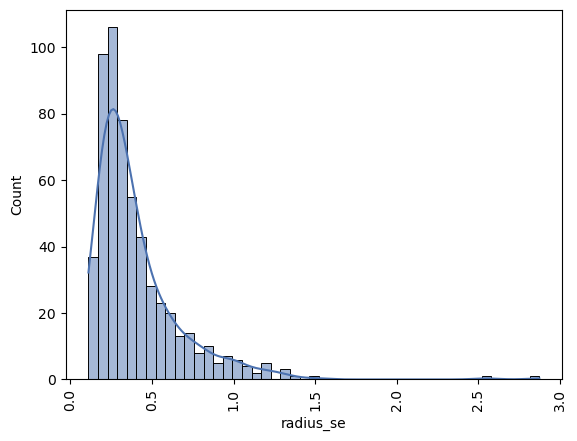

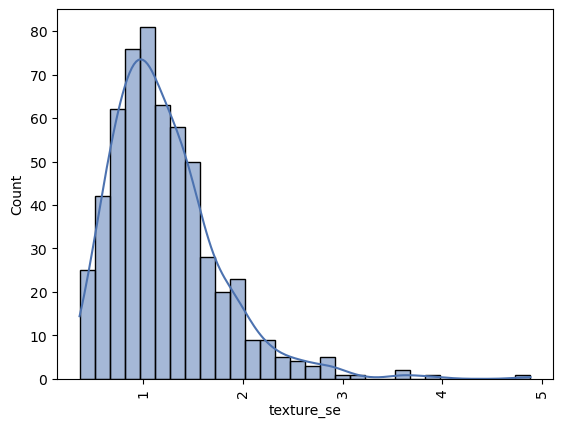

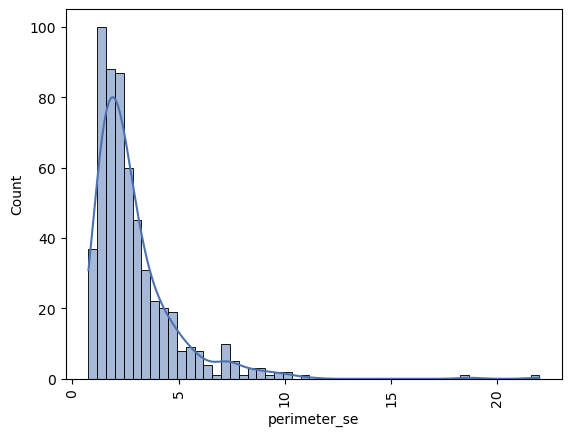

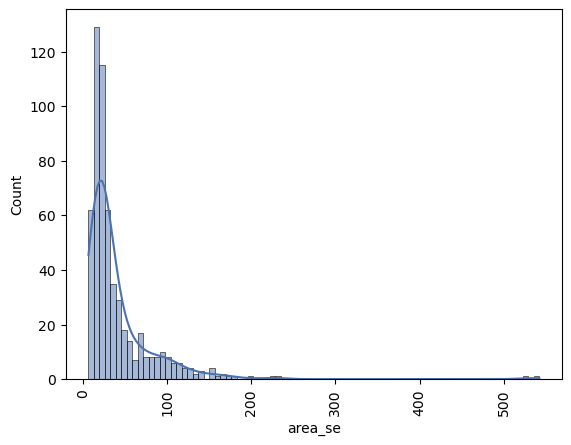

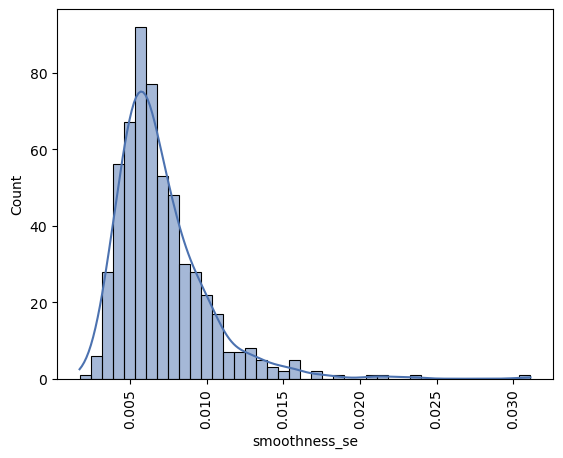

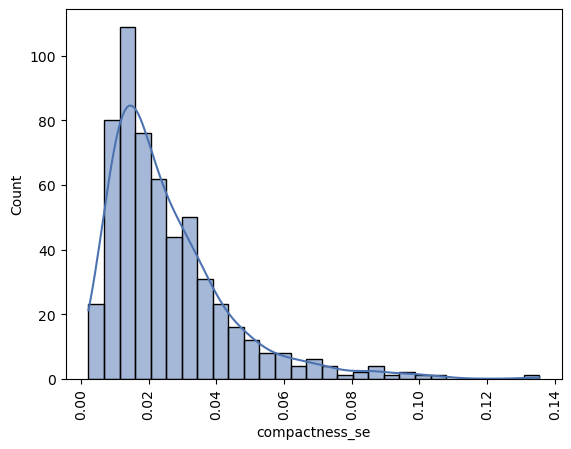

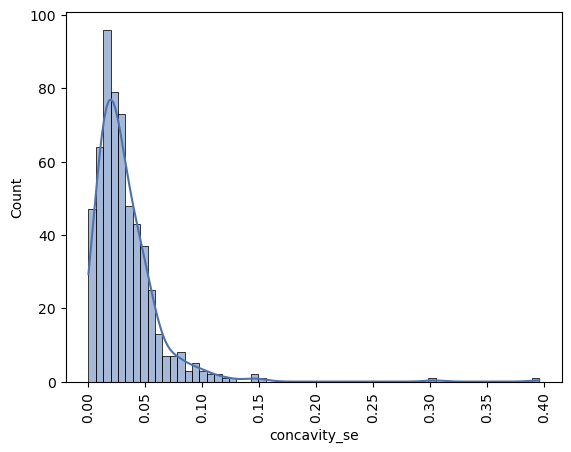

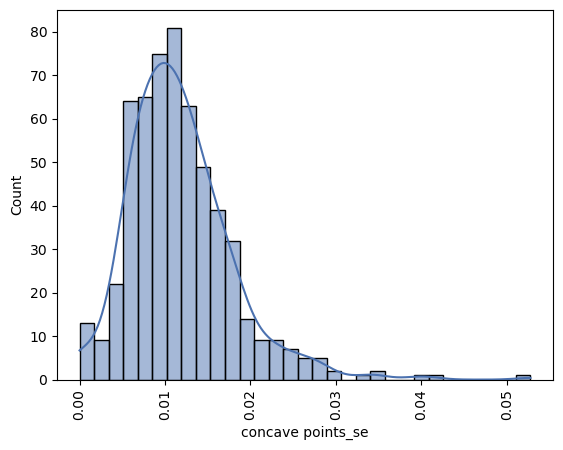

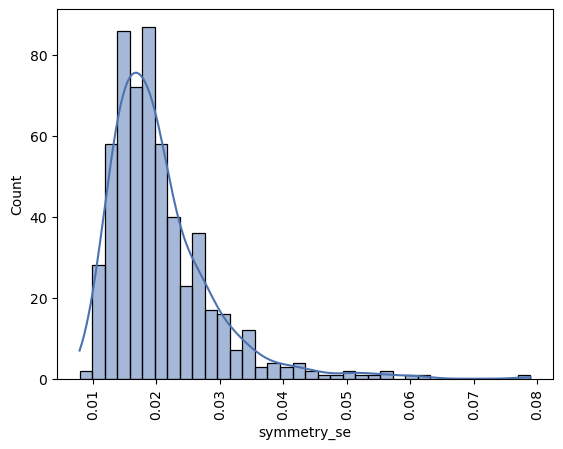

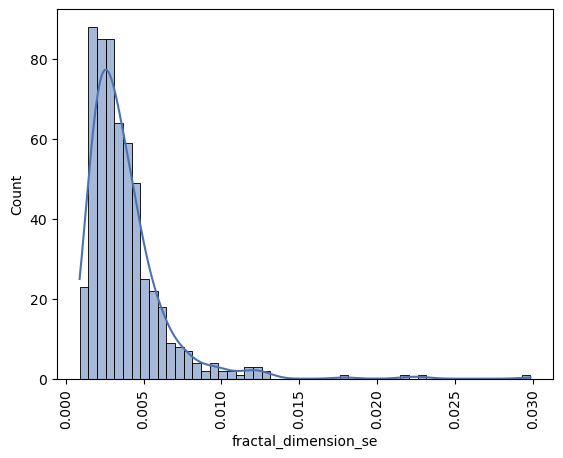

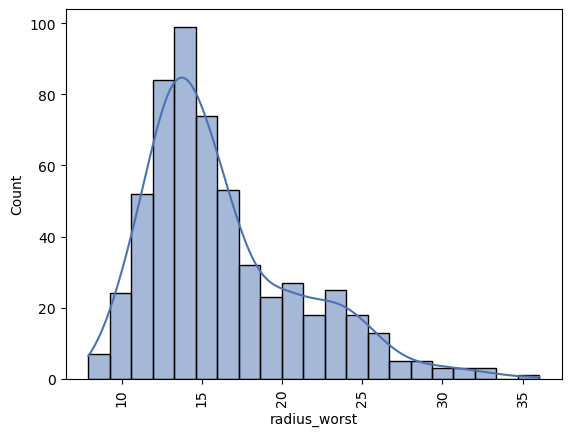

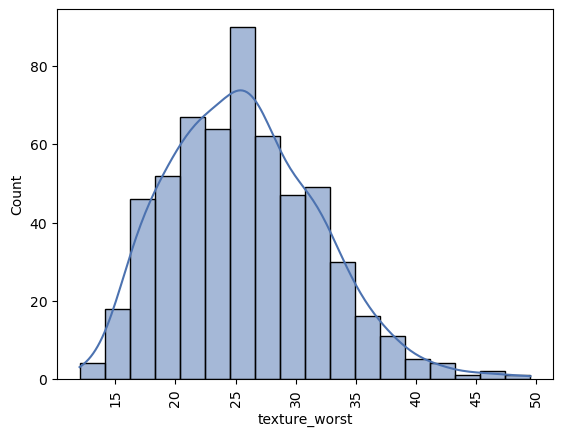

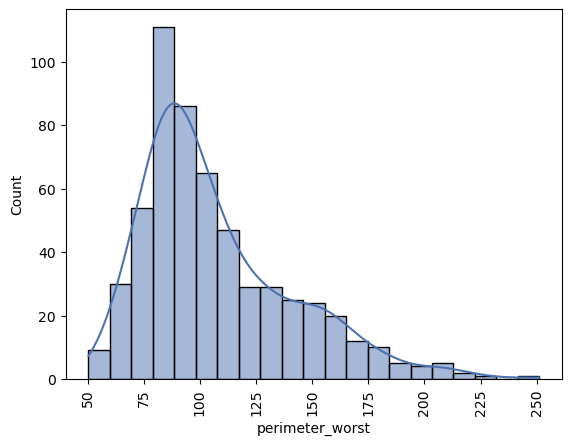

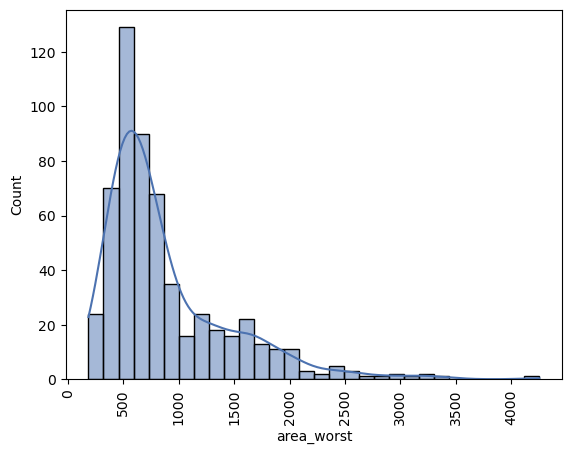

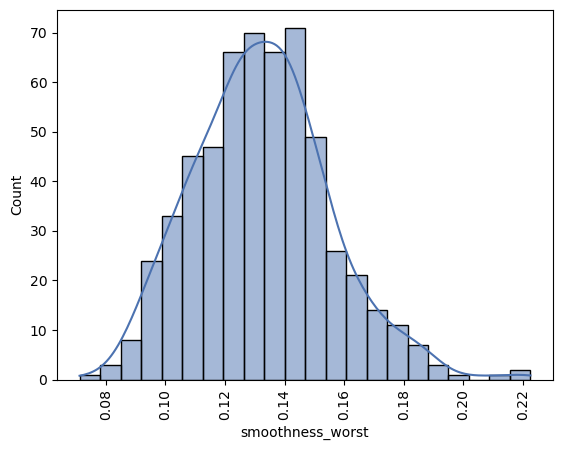

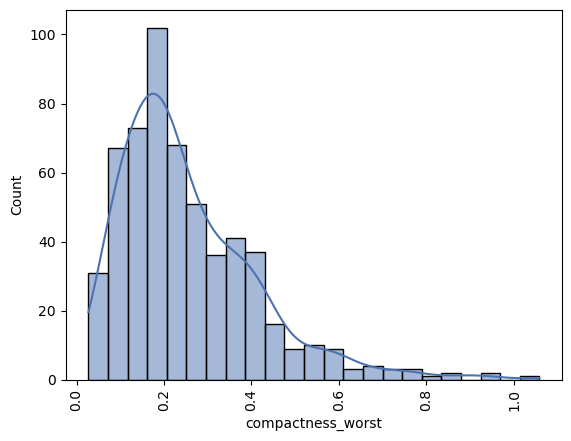

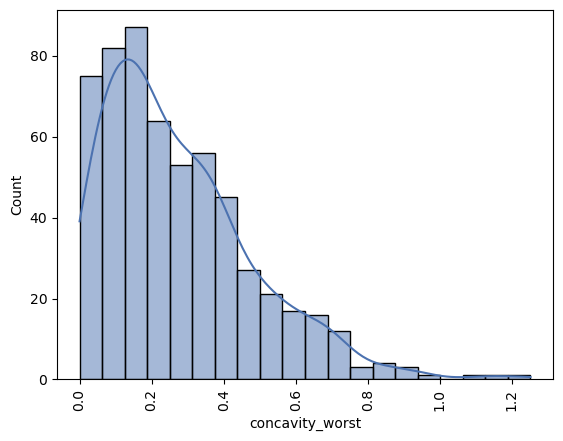

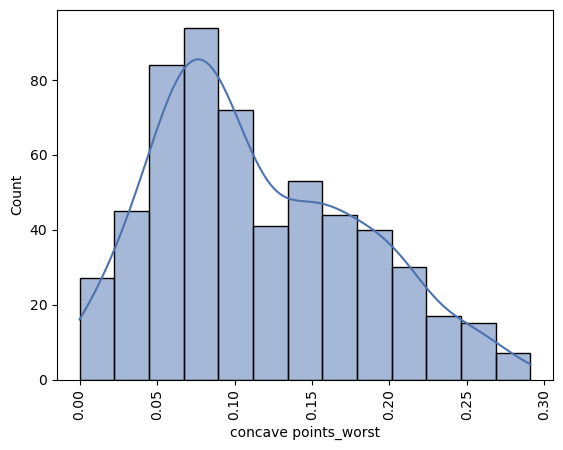

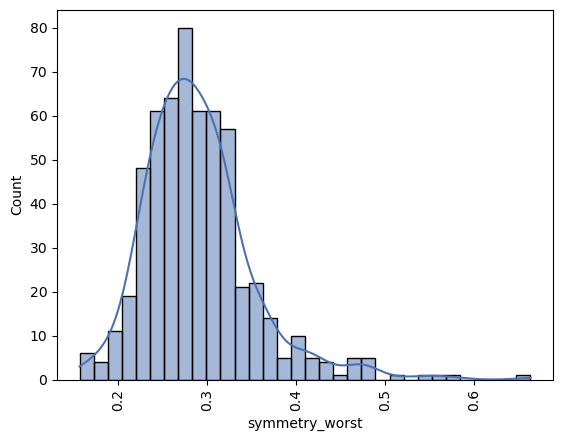

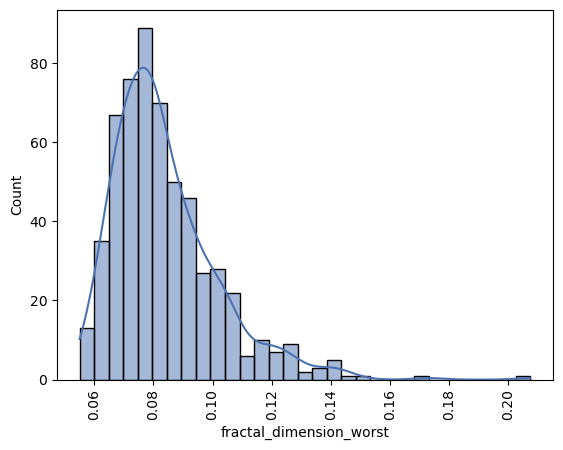

In [45]:
#Lets plot histplot for all columns
for i in newdf:
    plt.figure()
    sns.histplot(newdf[i],kde=True)
    
    plt.xticks(rotation=90)
    plt.show()

# Observation

    Outliers
        
        - area_mean have Outliers
        - compactness_mean have Outliers
        - concavity mean have Outliers
        - concave points_mean have Outliers
        - fractal_dimension_mean have Outliers
        - radius_se have Outliers
        - texture_se have Outliers
        - perimeter_se have Outliers
        - area_se have Outliers
        - smoothness_se have Outliers 
        - compactness_se have outliers
        - concavity have Outlies 
        - concave points_se have Outliers
        - Symmetry_se have outliers
        - fractol_dimension_se have outliers 
        - area_worst have outliers
        - compactness_worsk have outliers
        - concavity_worsk have outliers
      
        

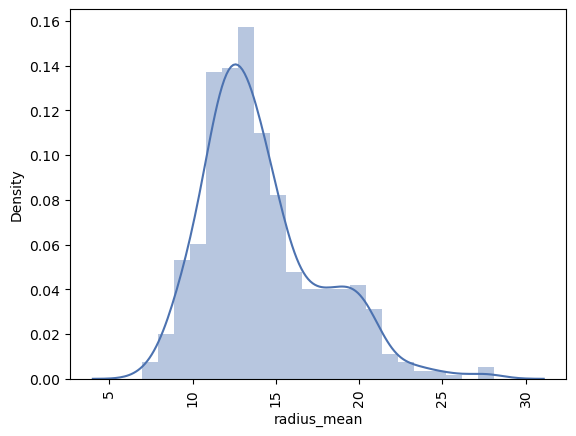

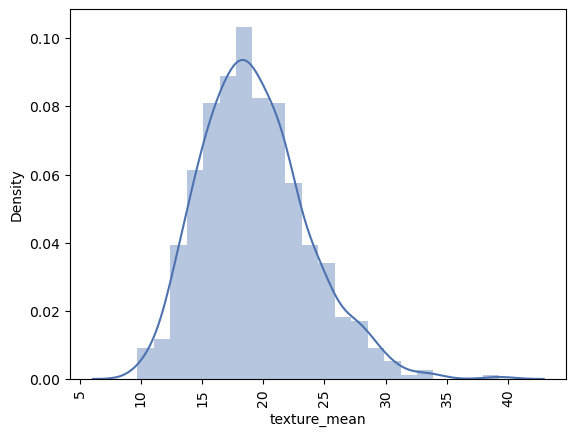

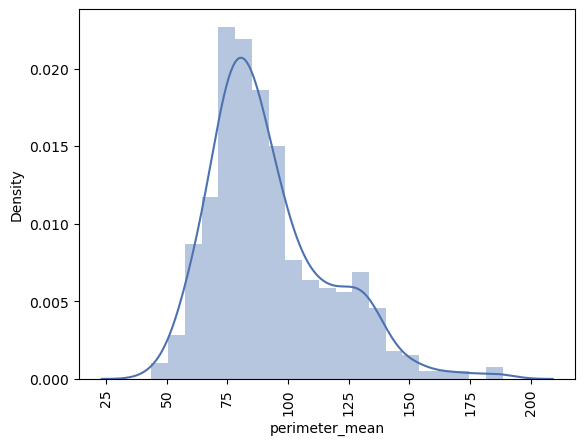

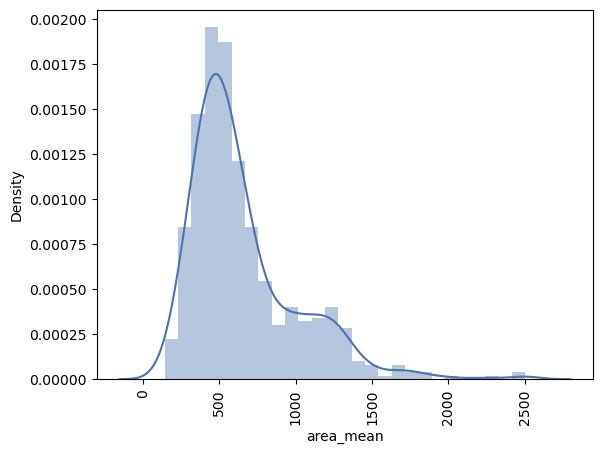

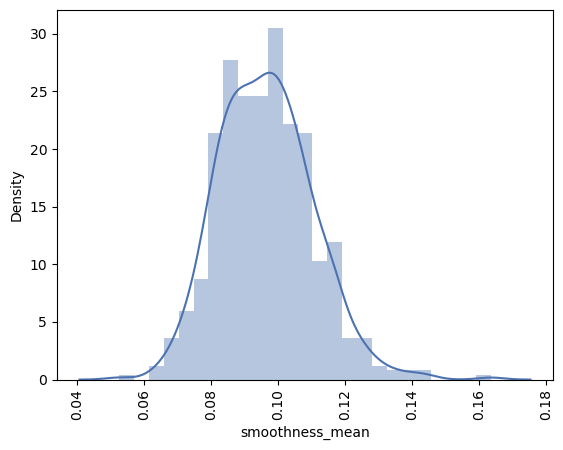

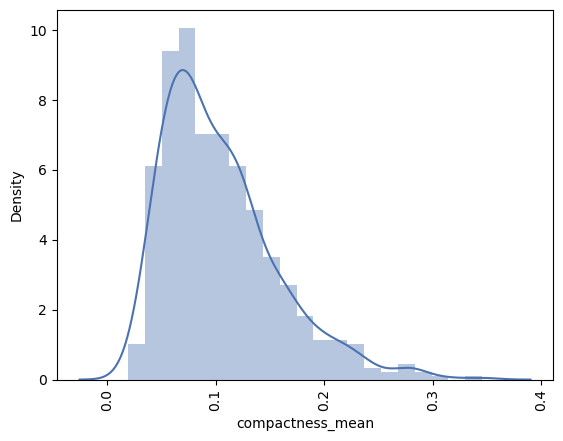

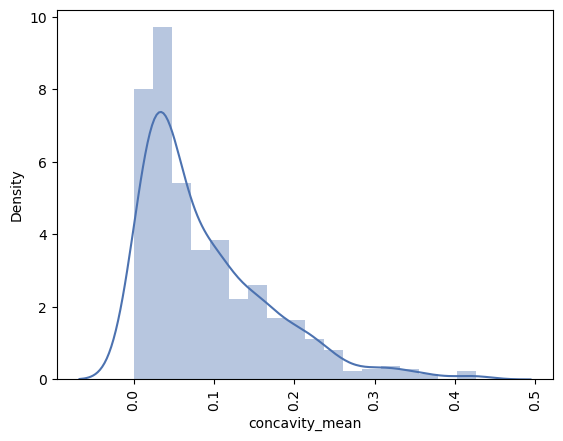

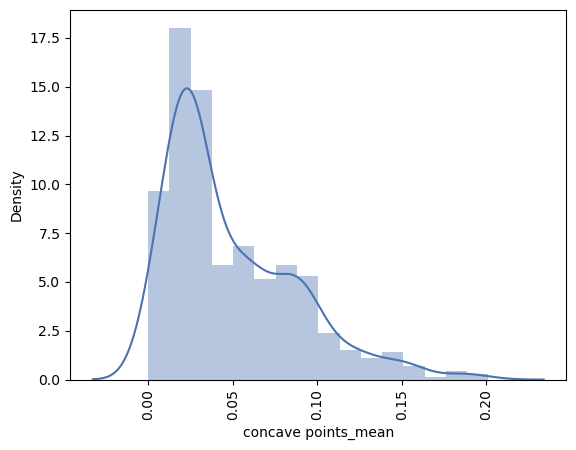

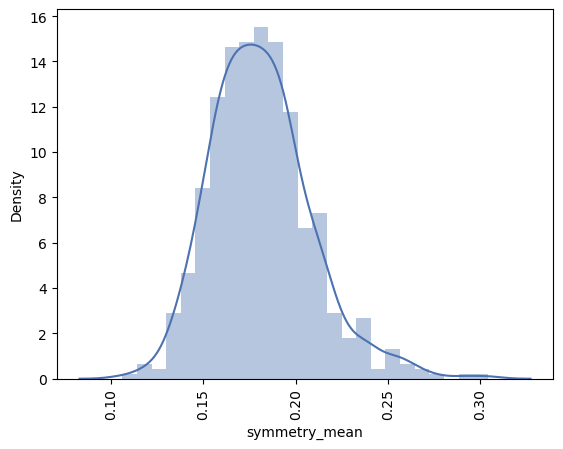

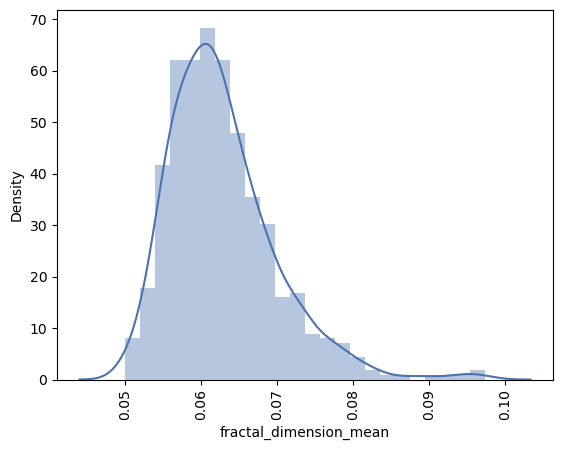

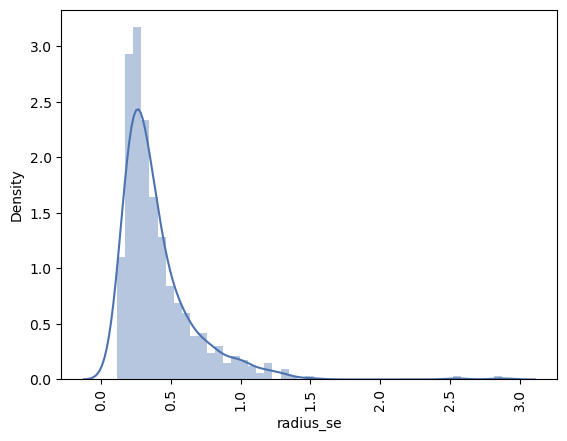

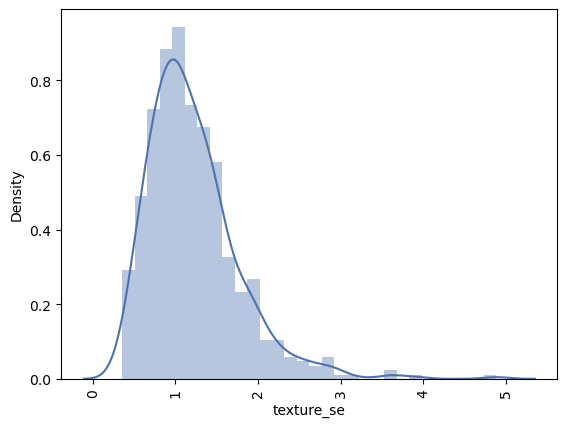

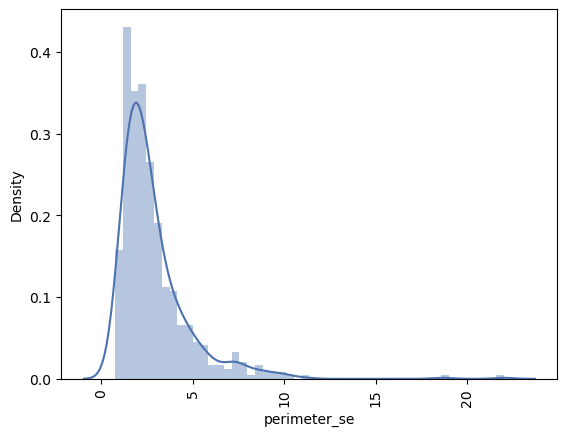

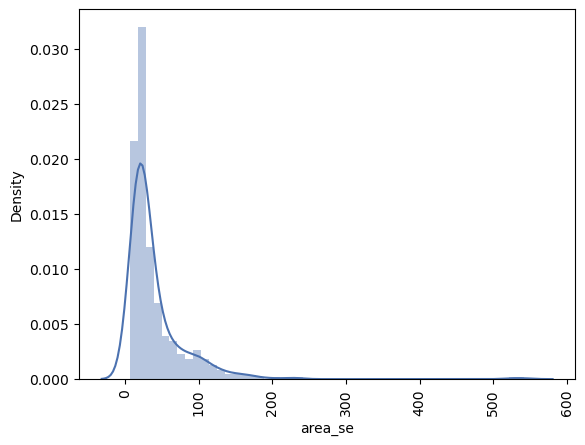

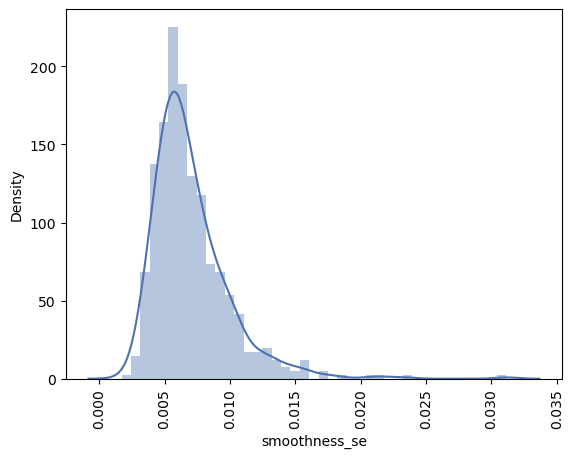

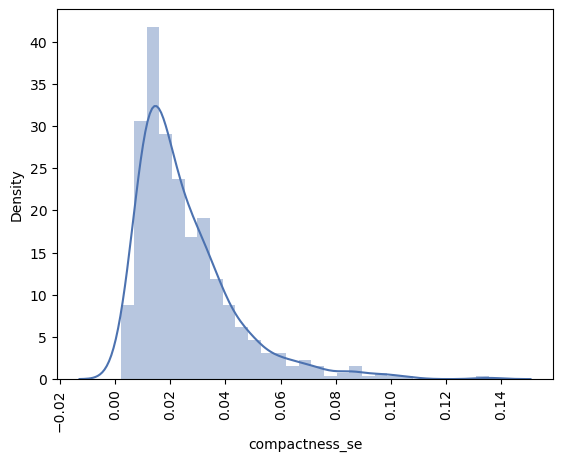

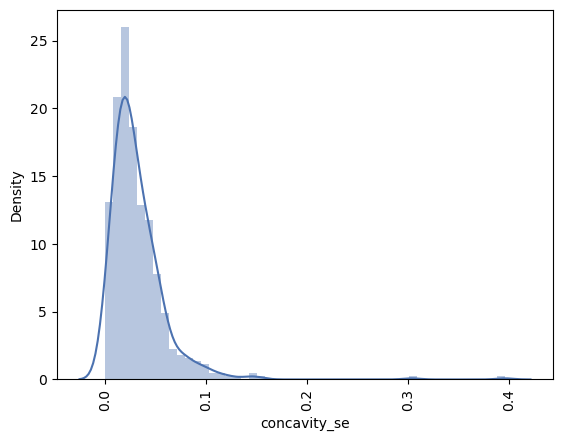

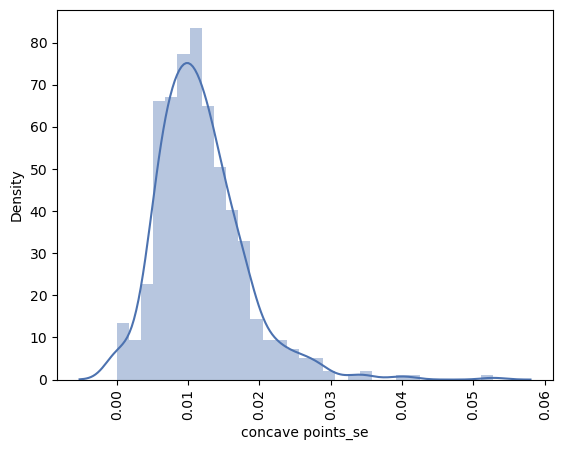

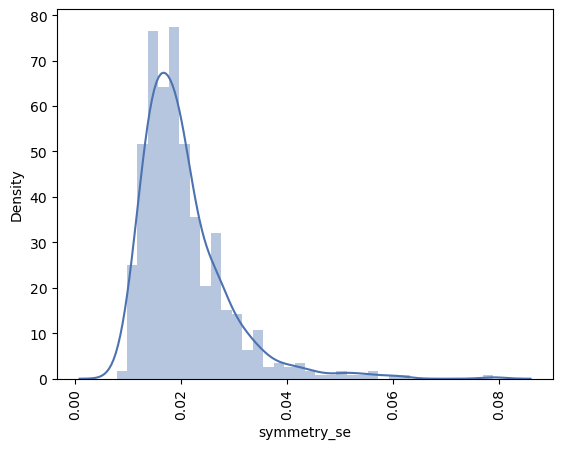

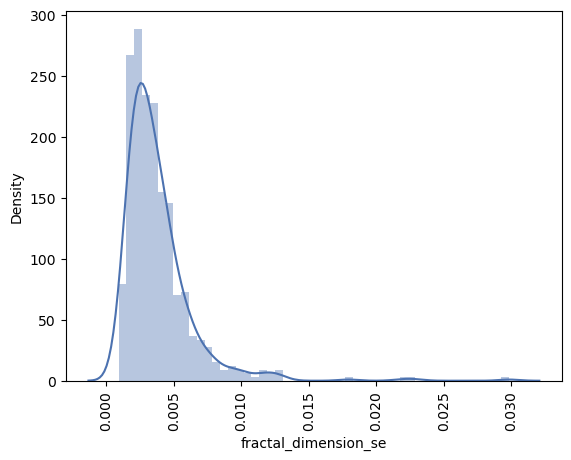

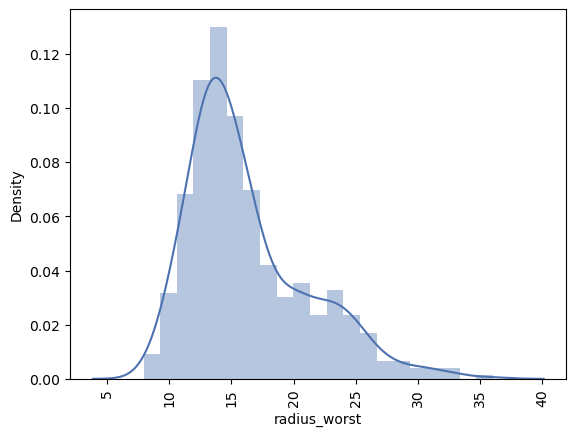

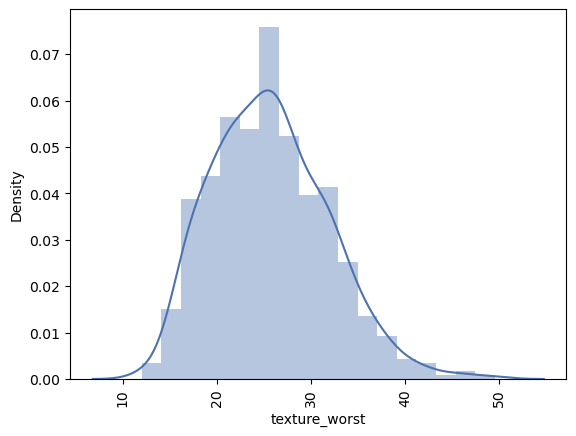

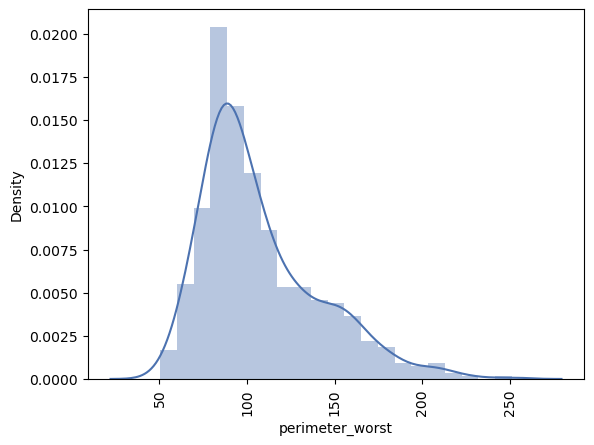

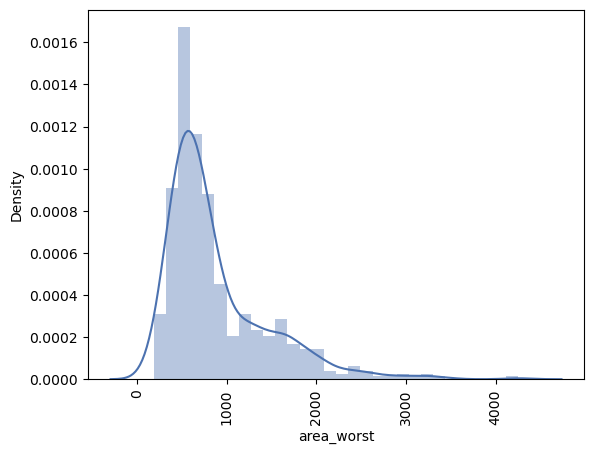

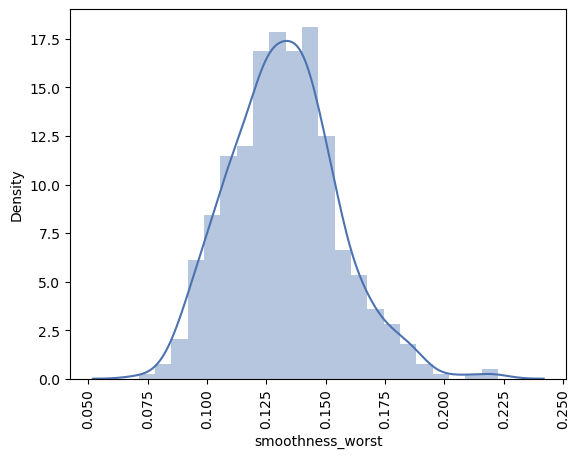

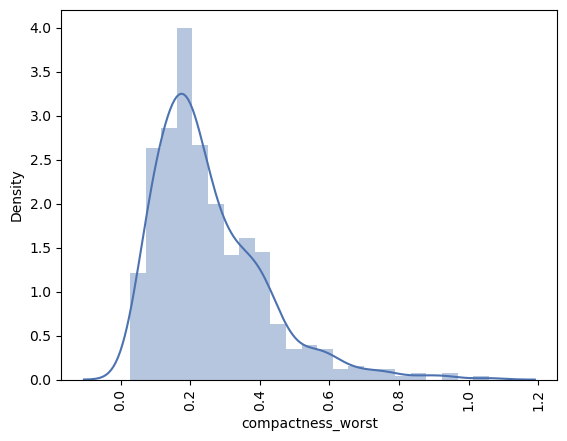

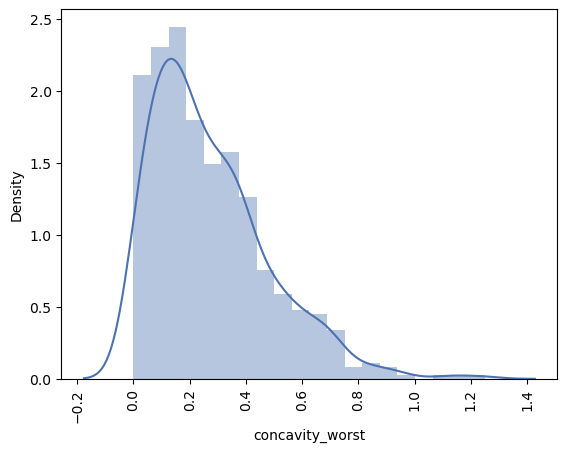

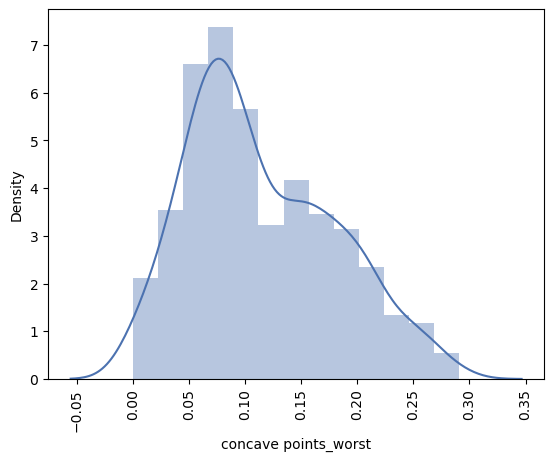

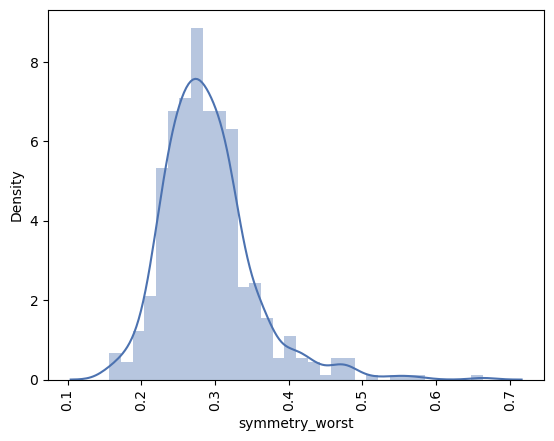

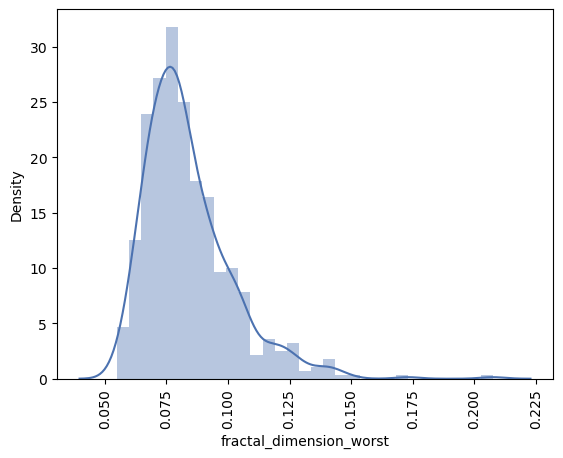

In [46]:
#Lets plot distplot for all columns
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i],kde=True)
    
    plt.xticks(rotation=90)
    plt.show()

# Observation

    Outliers
        
        - area_mean have Outliers
        - compactness_mean have Outliers
        - concavity mean have Outliers
        - concave points_mean have Outliers
        - fractal_dimension_mean have Outliers
        - radius_se have Outliers
        - texture_se have Outliers
        - perimeter_se have Outliers
        - area_se have Outliers
        - smoothness_se have Outliers 
        - compactness_se have Outliers
        - concavity have Outlies 
        - concave points_se have Outliers
        - Symmetry_se have Outliers
        - fractol_dimension_se have Outliers 
        - area_worst have Outliers
        - compactness_worsk have Outliers
        - concavity_worsk have Outliers
      
        

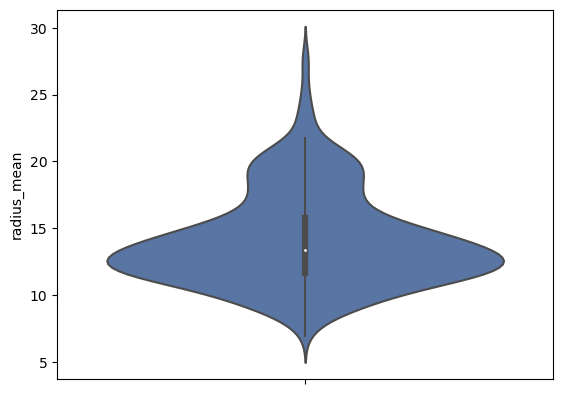

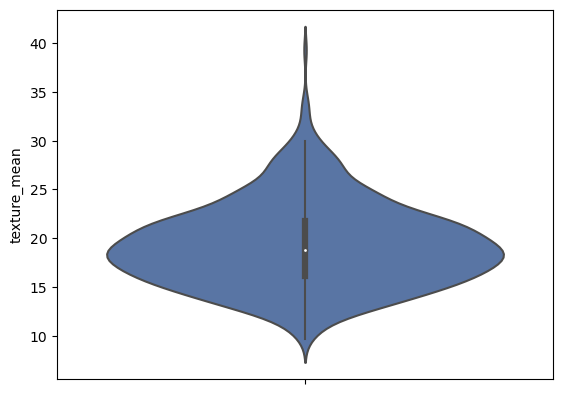

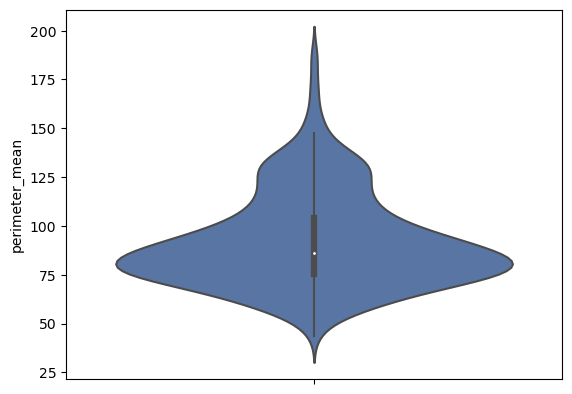

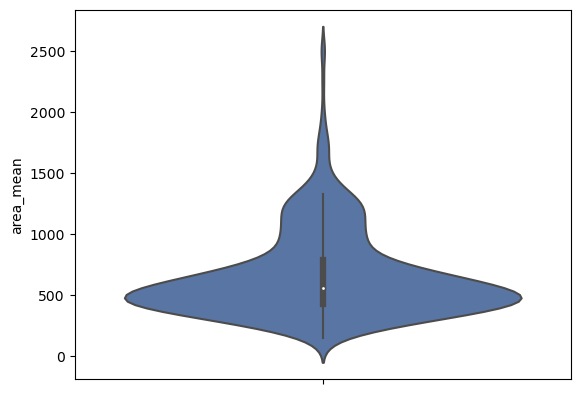

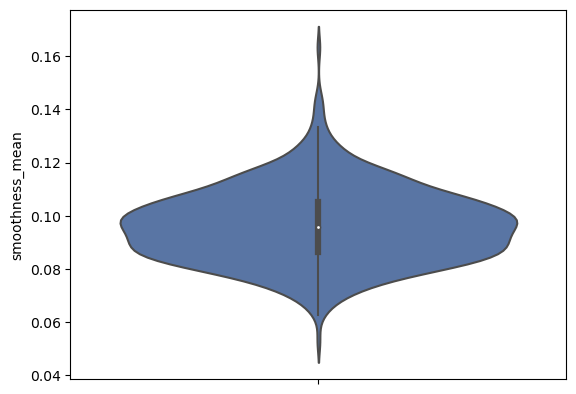

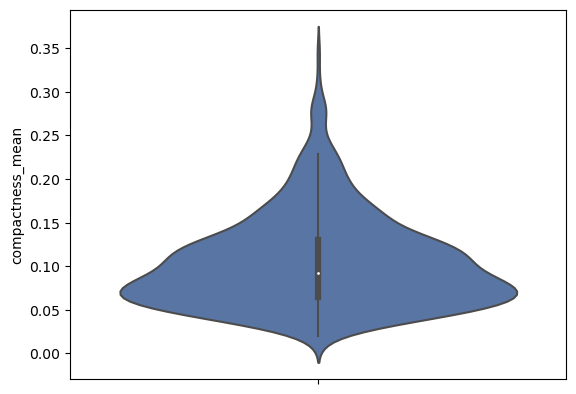

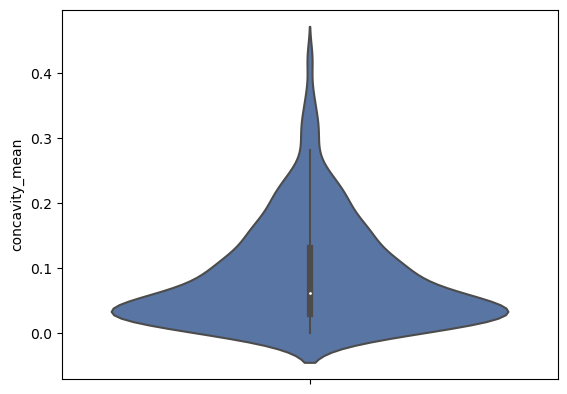

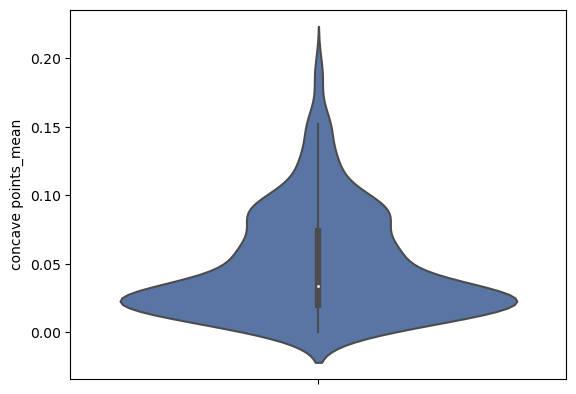

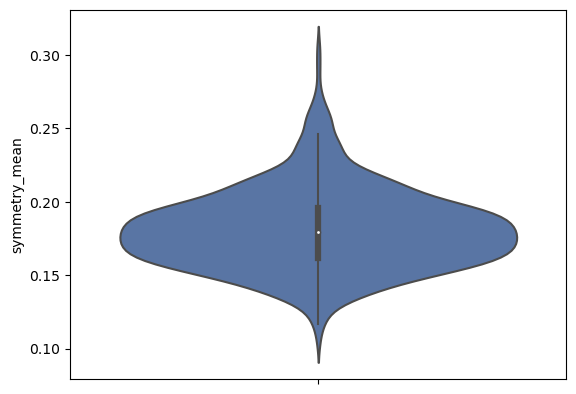

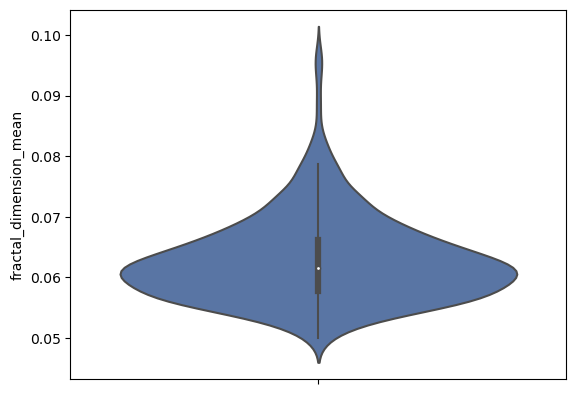

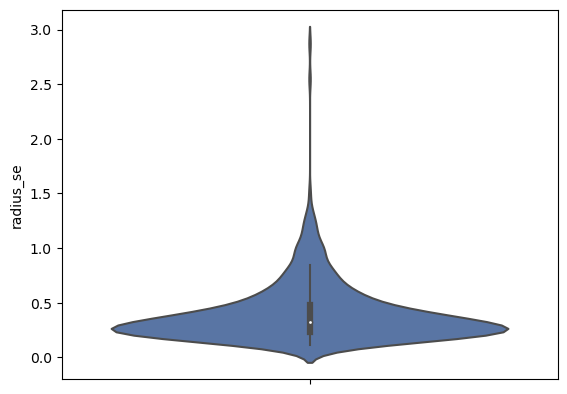

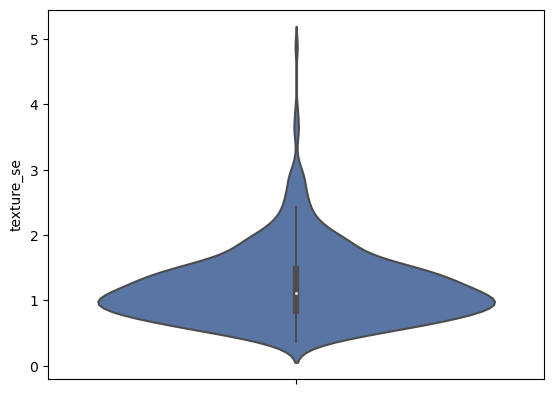

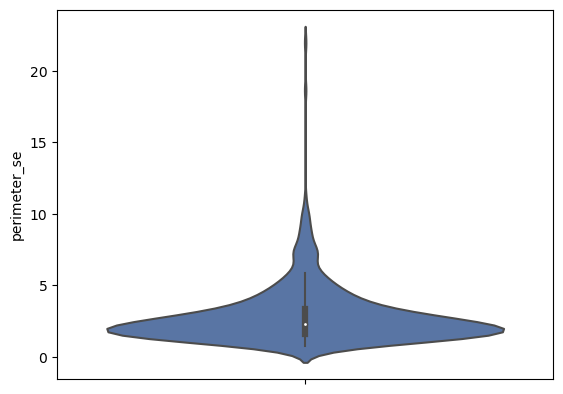

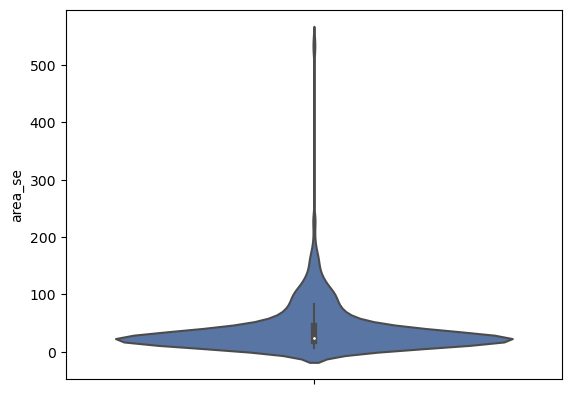

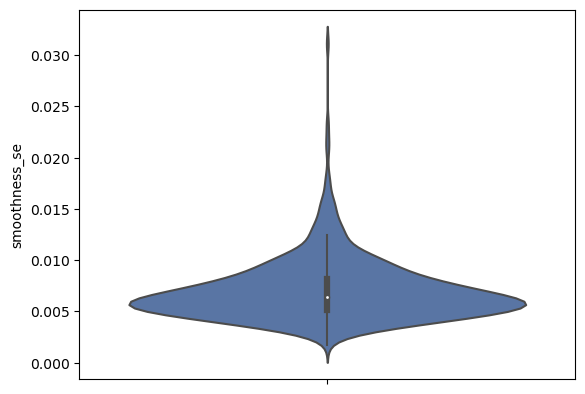

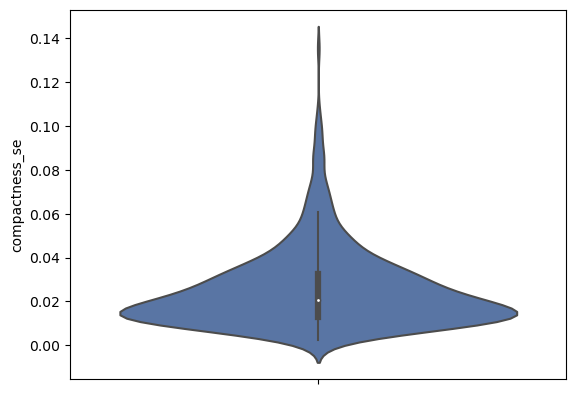

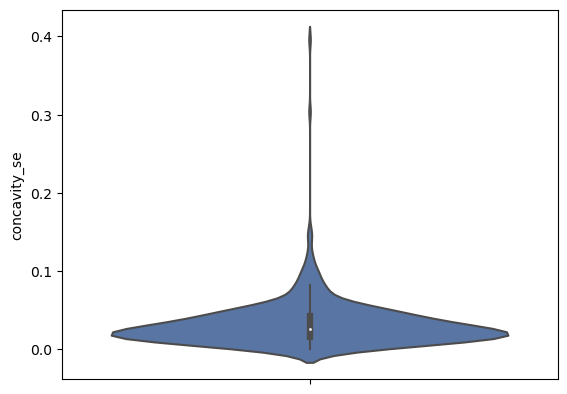

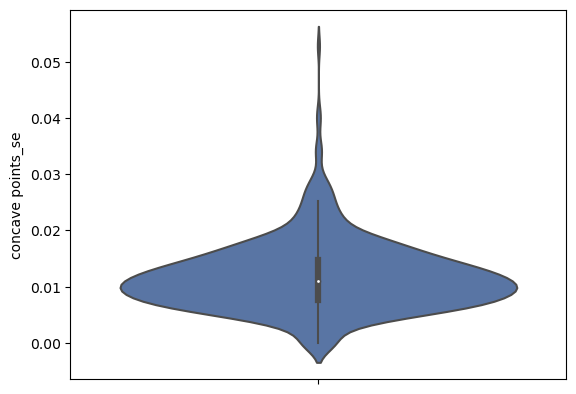

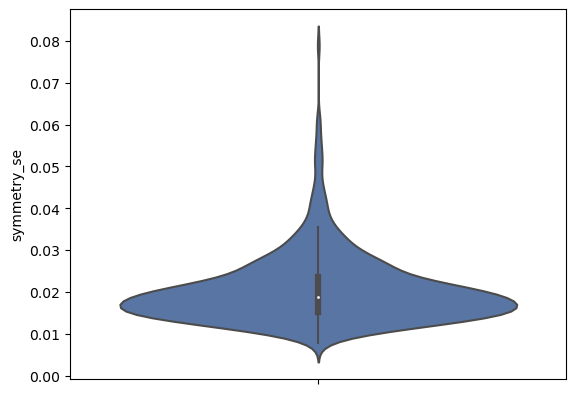

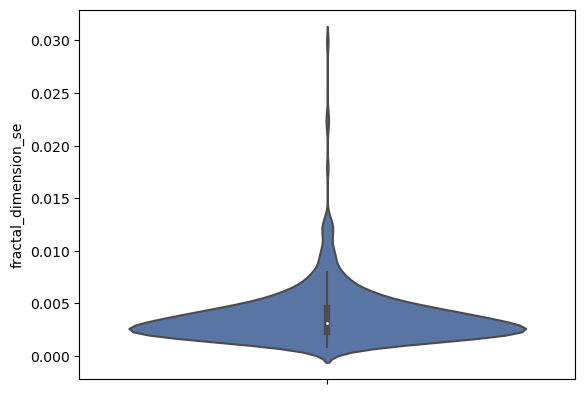

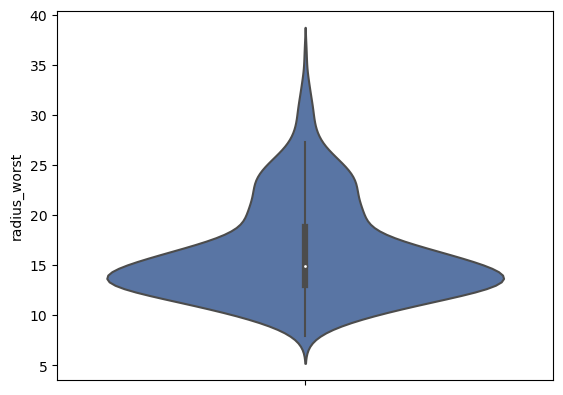

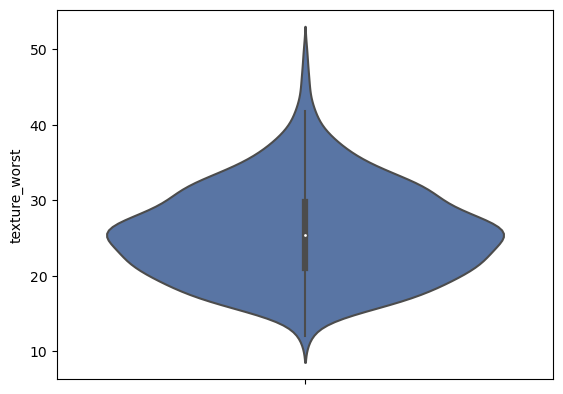

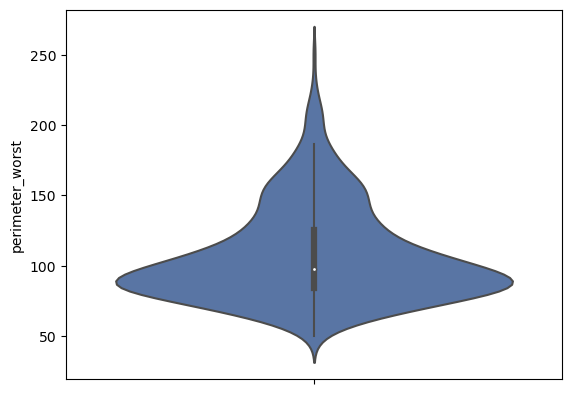

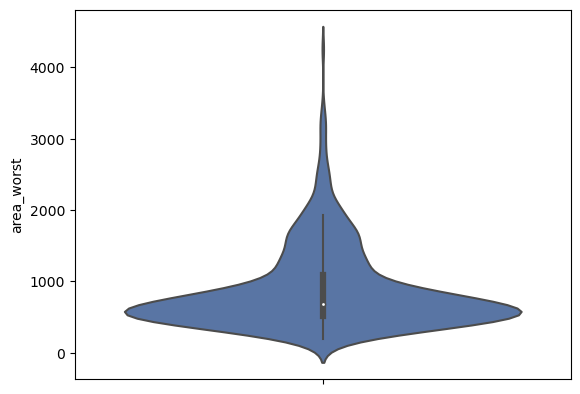

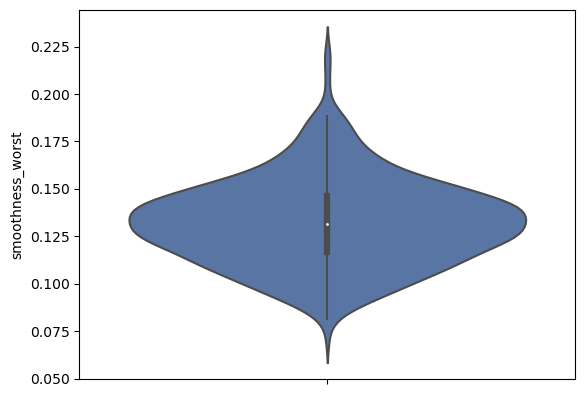

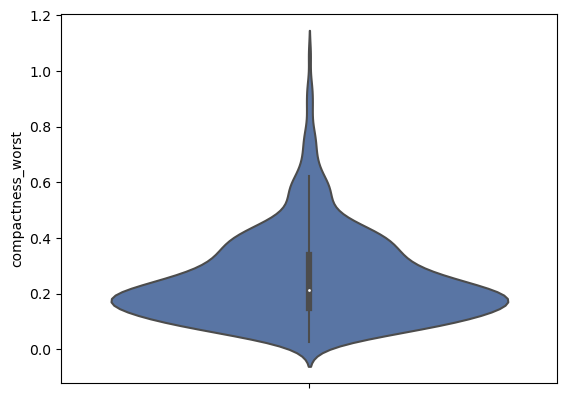

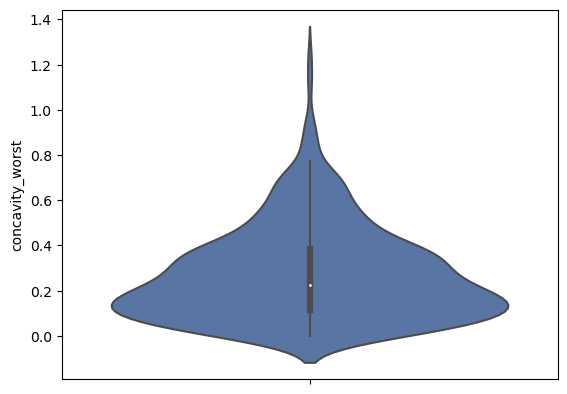

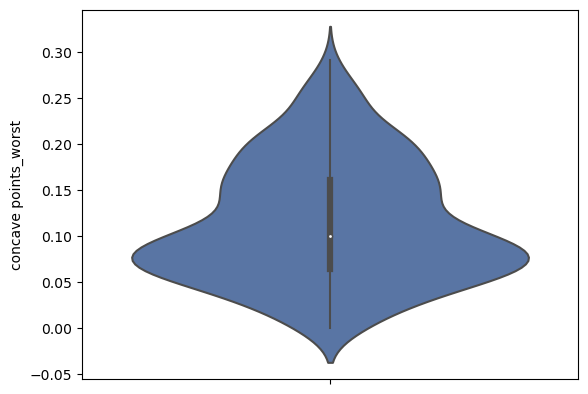

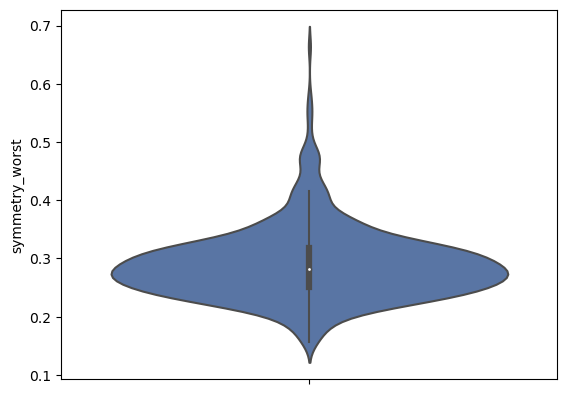

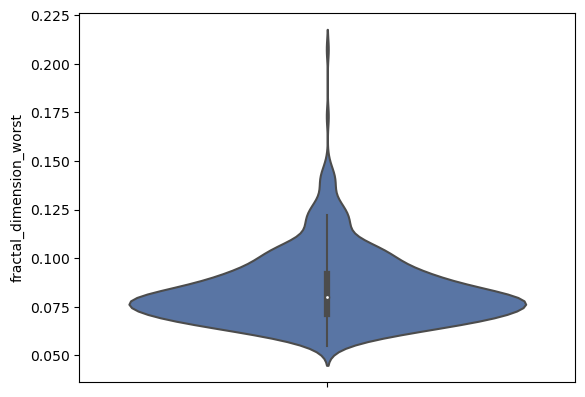

In [53]:
#Lets plot violinplot for all columns to check outliers
for i in newdf:
    plt.figure()
    sns.violinplot(y=(newdf[i]))

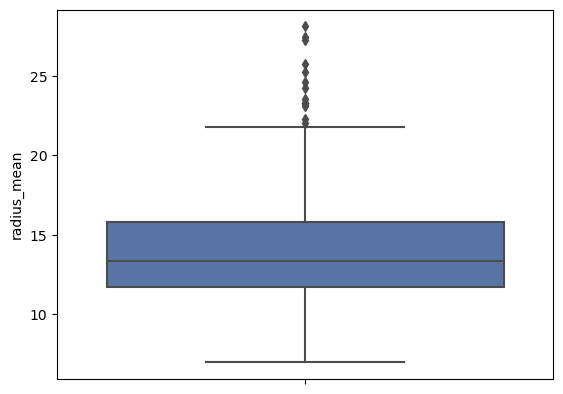

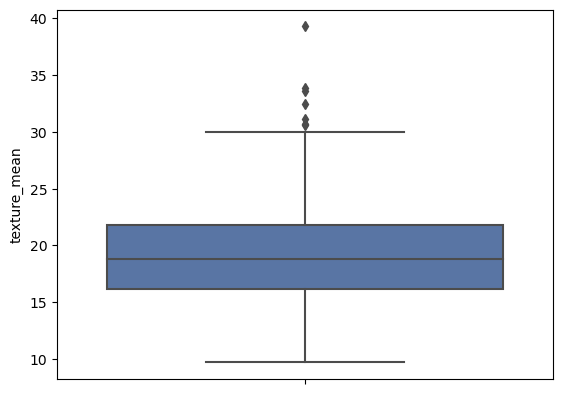

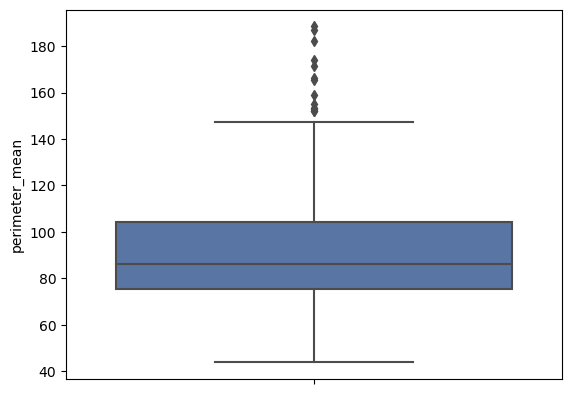

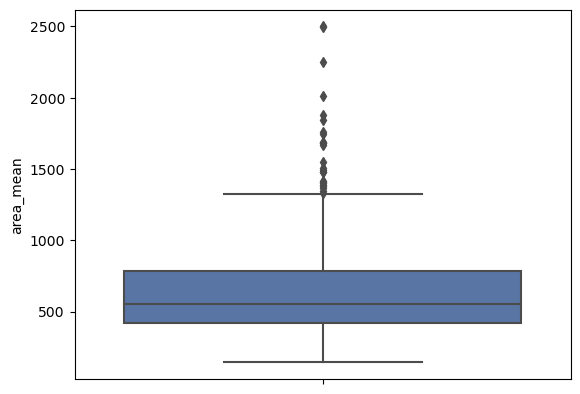

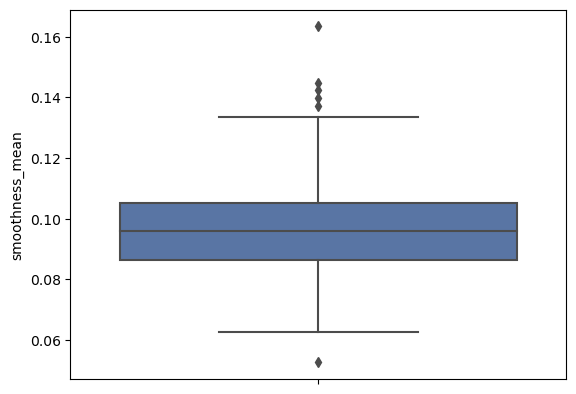

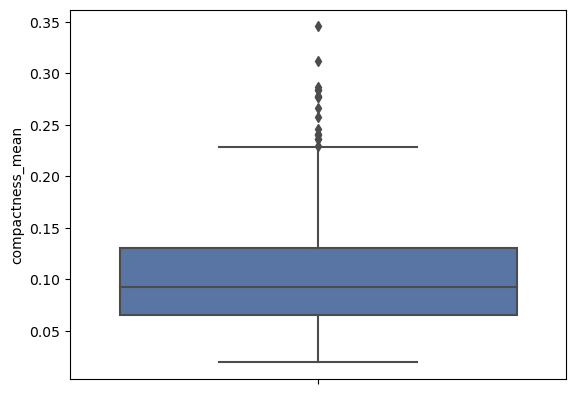

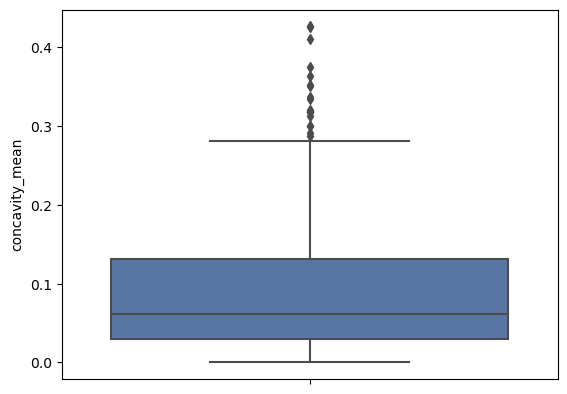

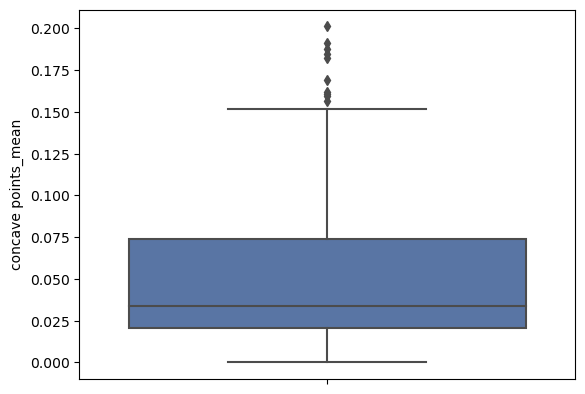

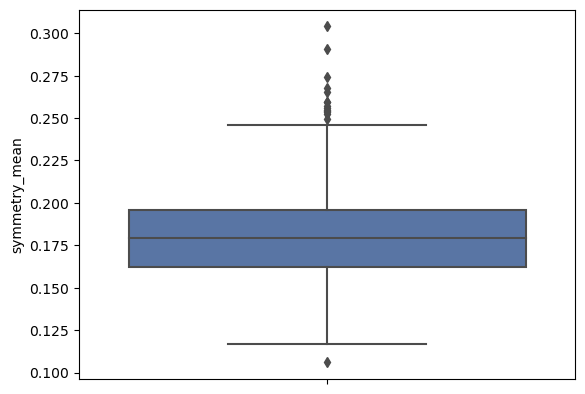

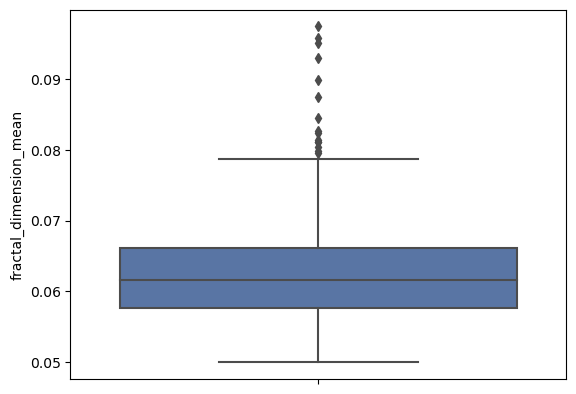

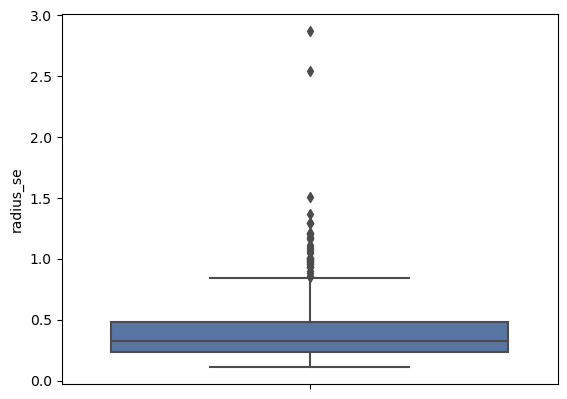

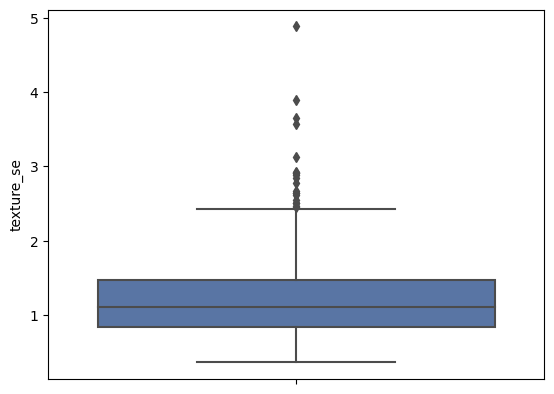

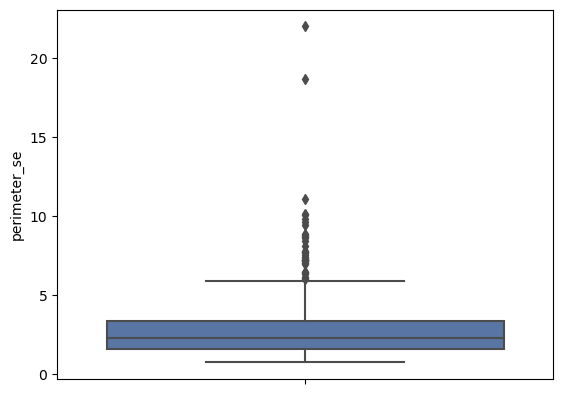

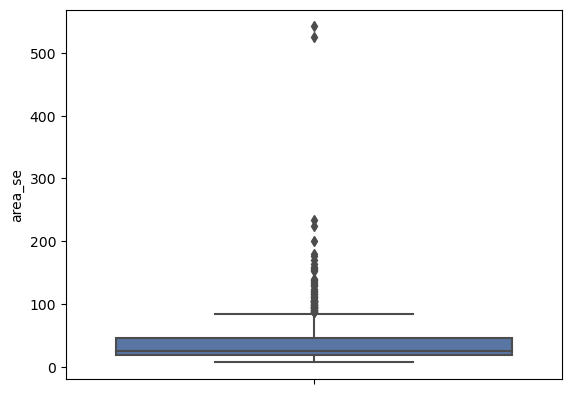

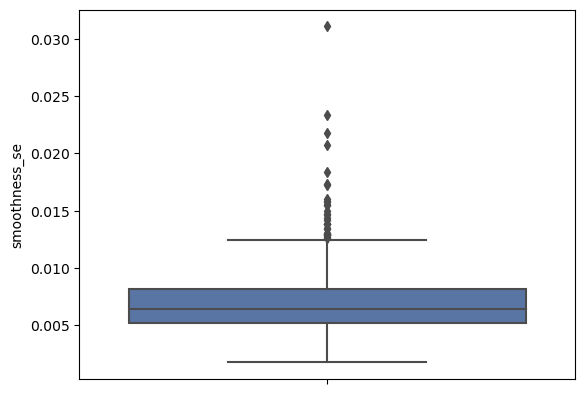

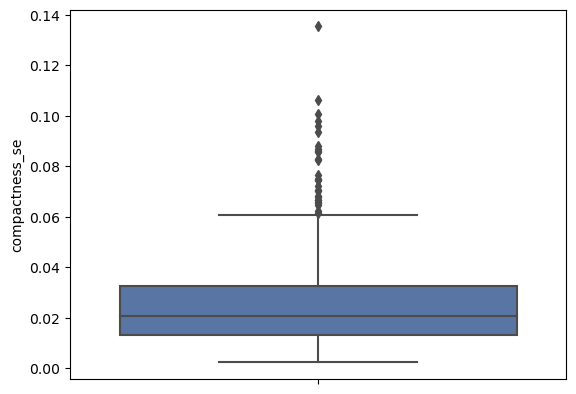

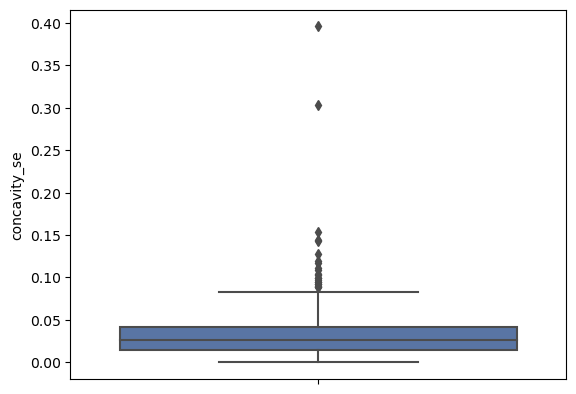

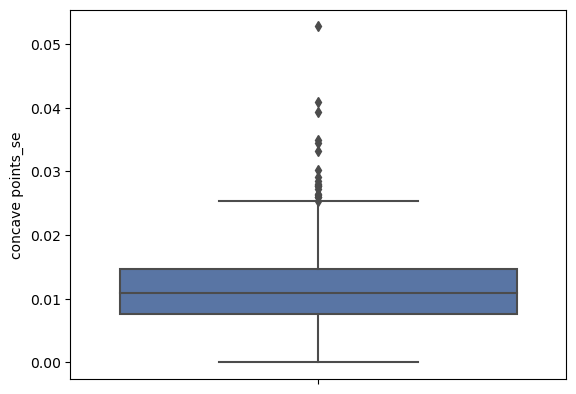

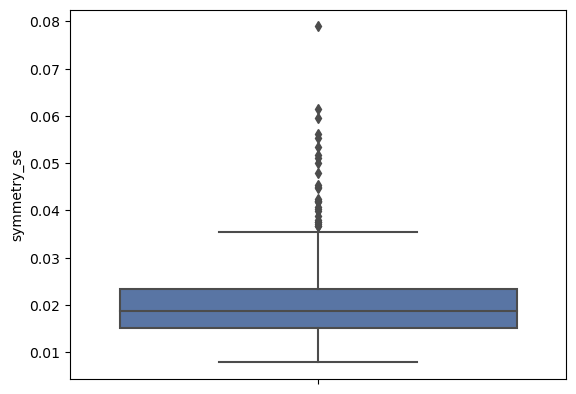

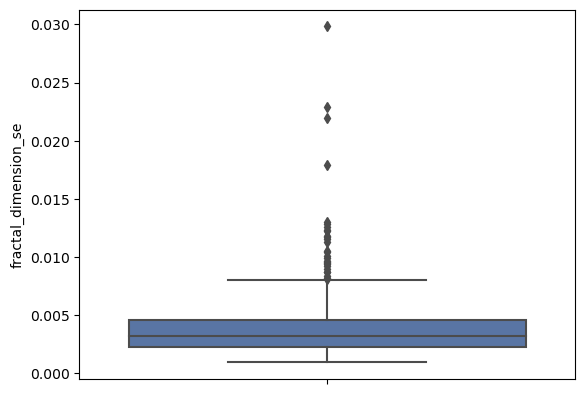

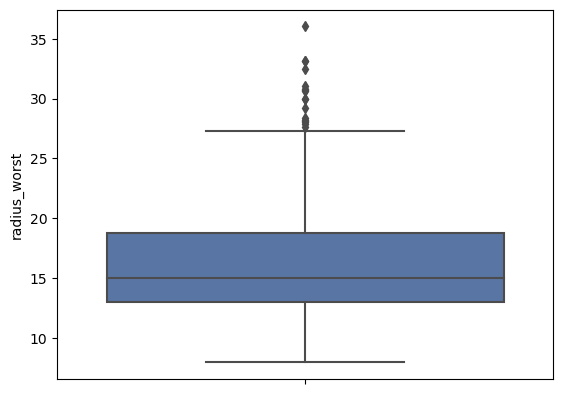

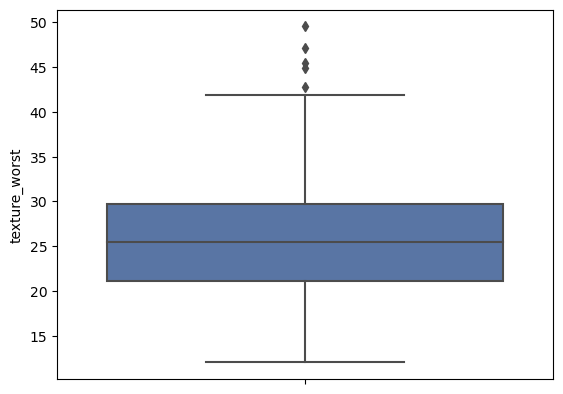

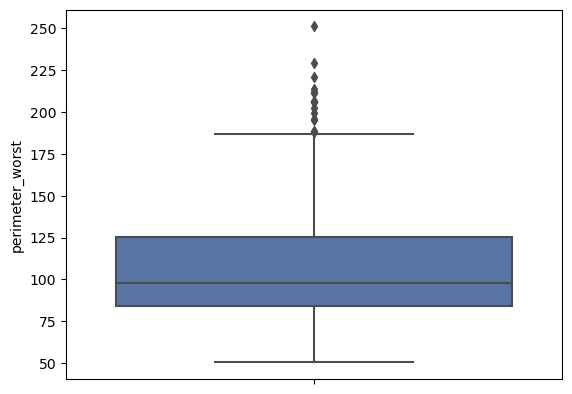

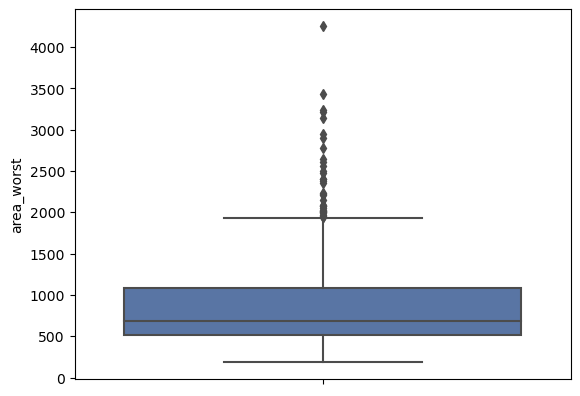

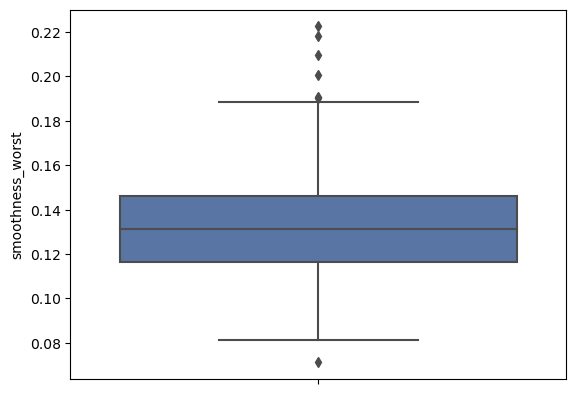

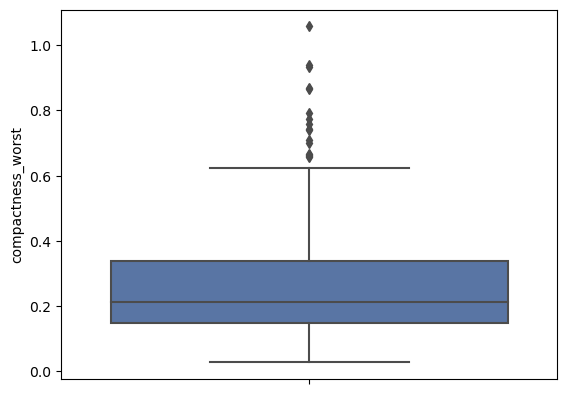

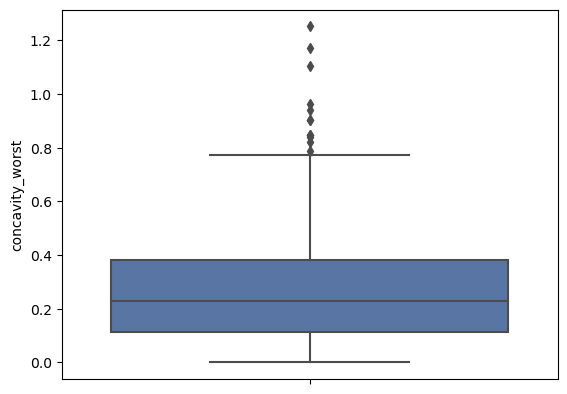

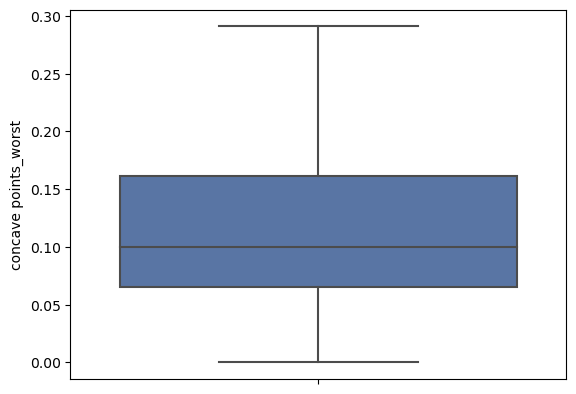

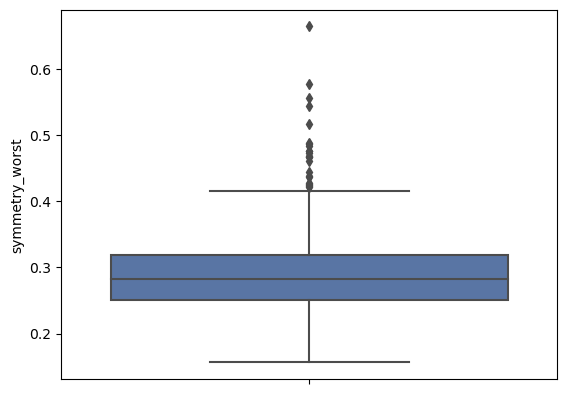

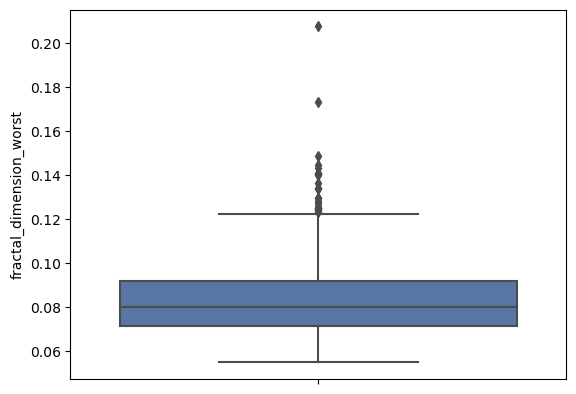

In [57]:
#Lets plot Boxplot for all columns to check outliers
for i in newdf:
    plt.figure()
    sns.boxplot(y=(newdf[i]))

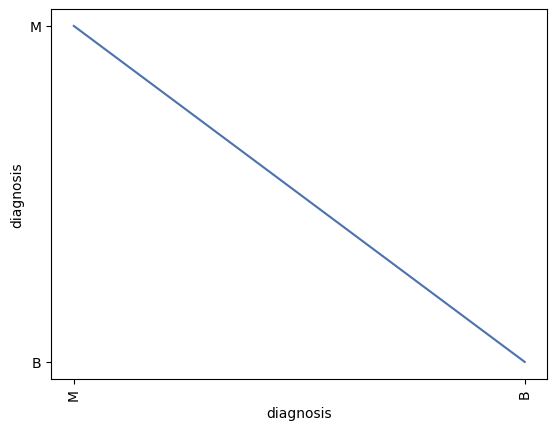

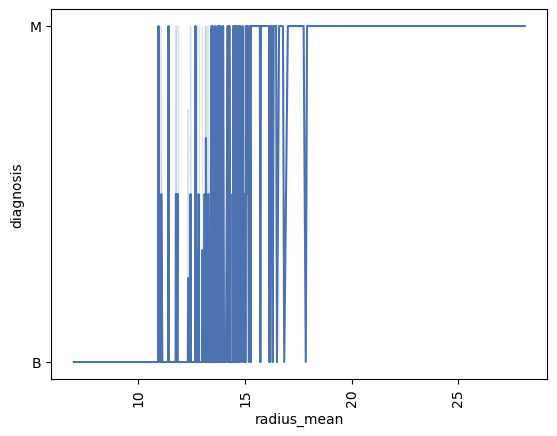

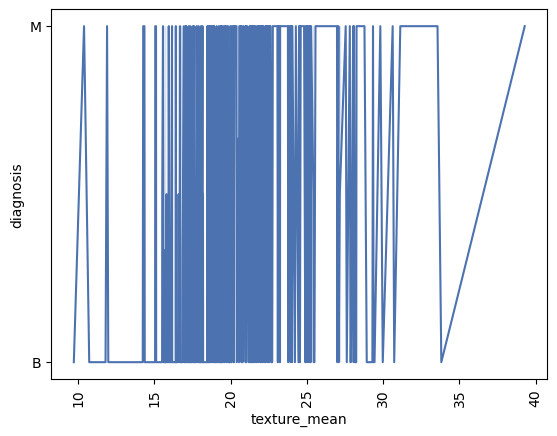

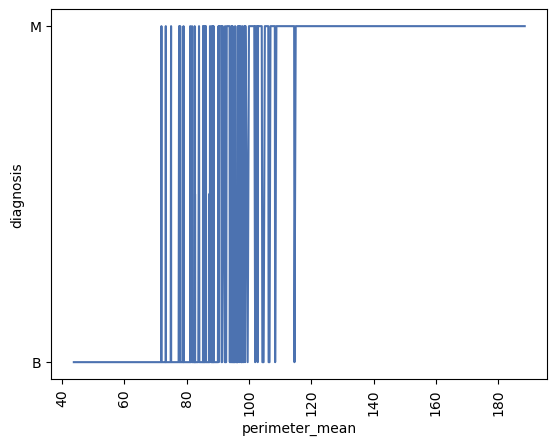

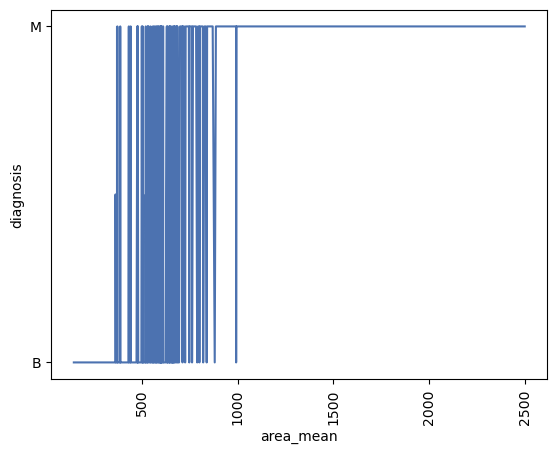

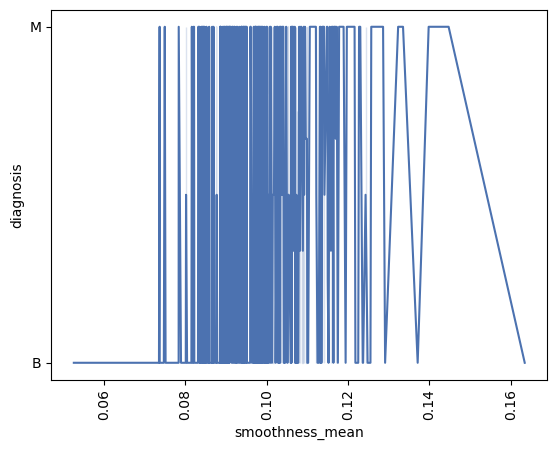

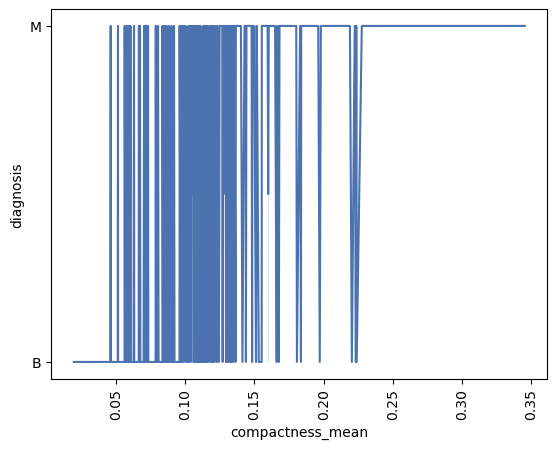

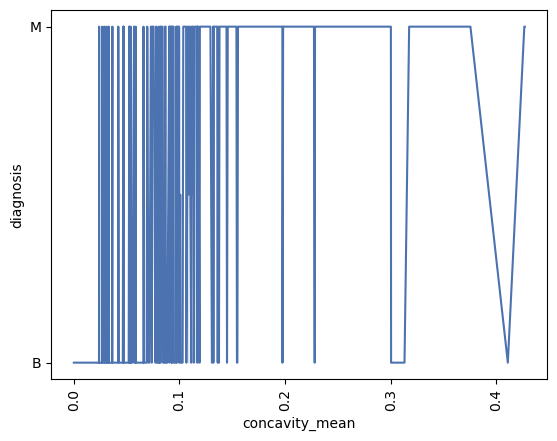

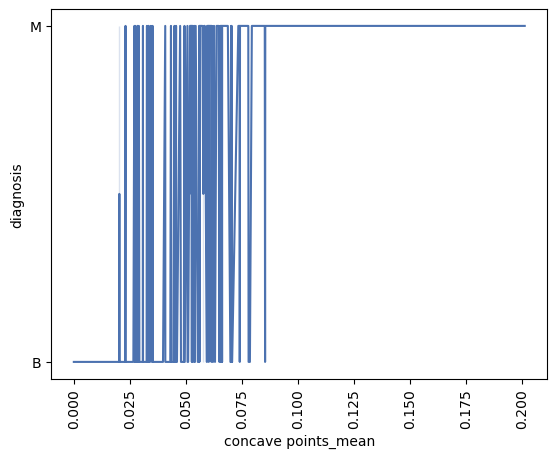

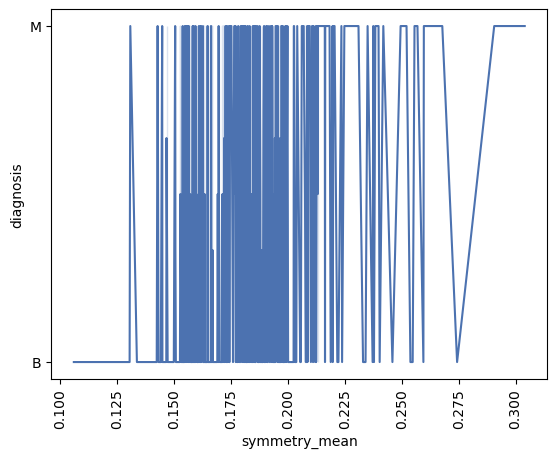

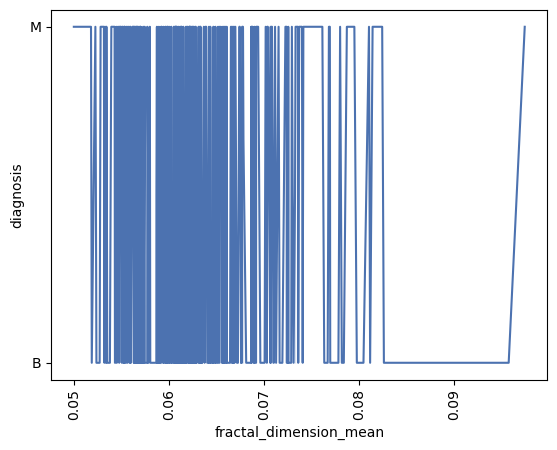

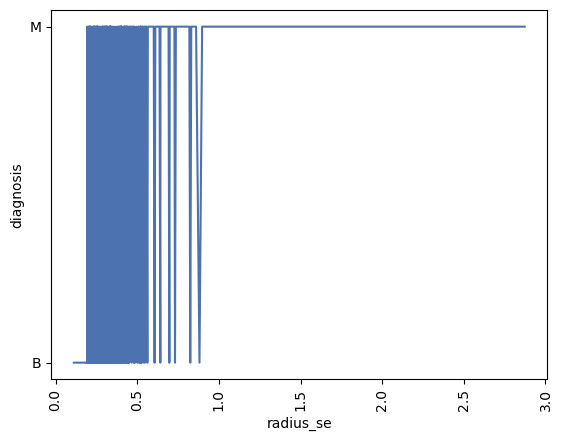

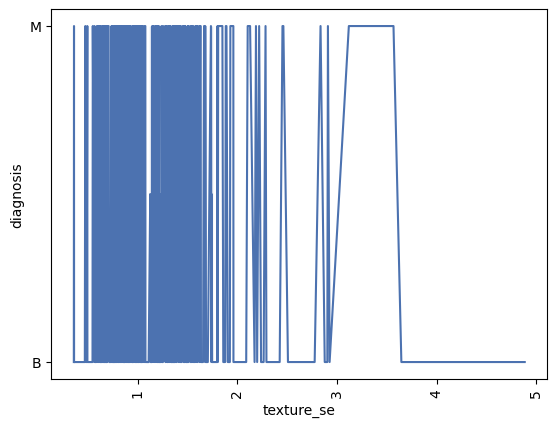

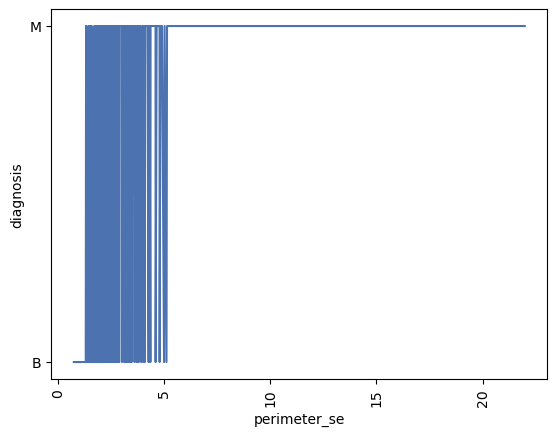

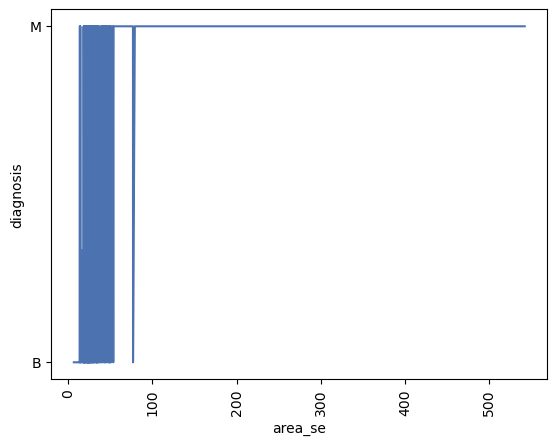

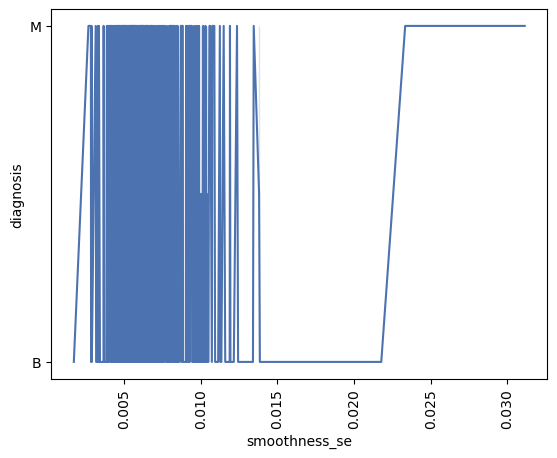

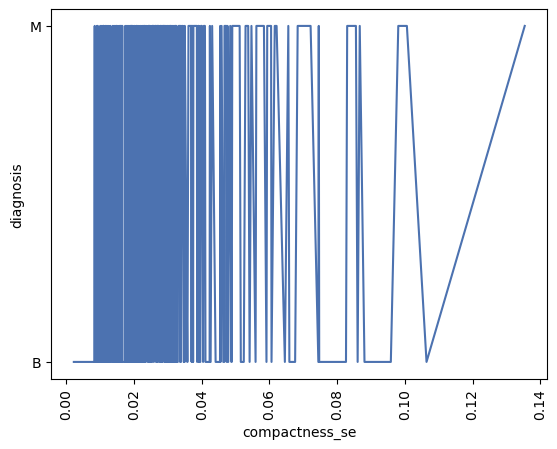

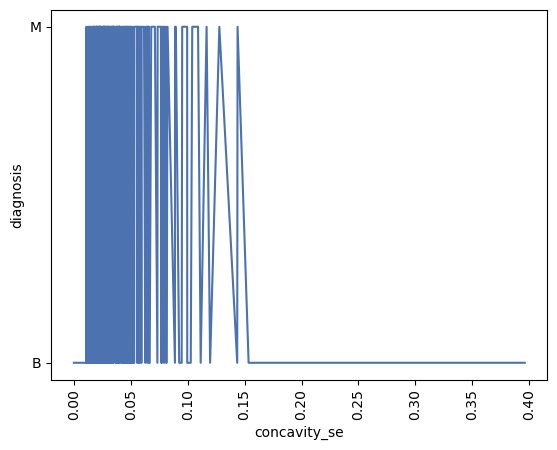

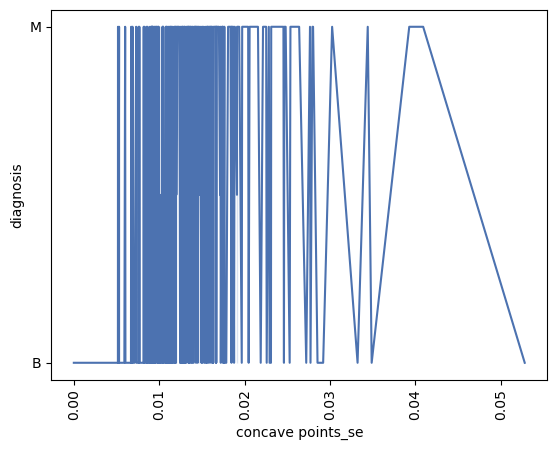

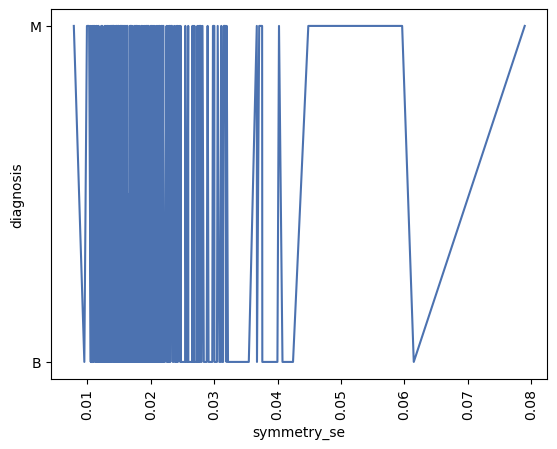

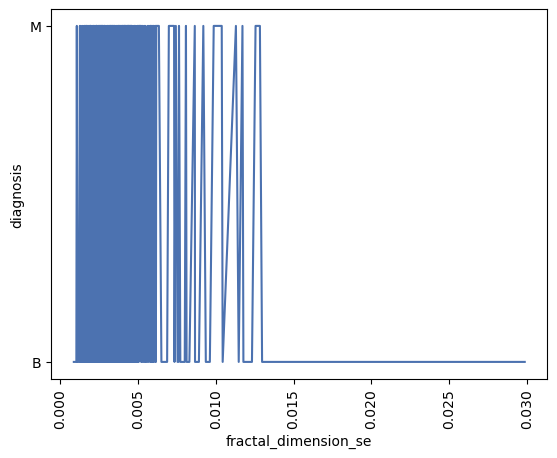

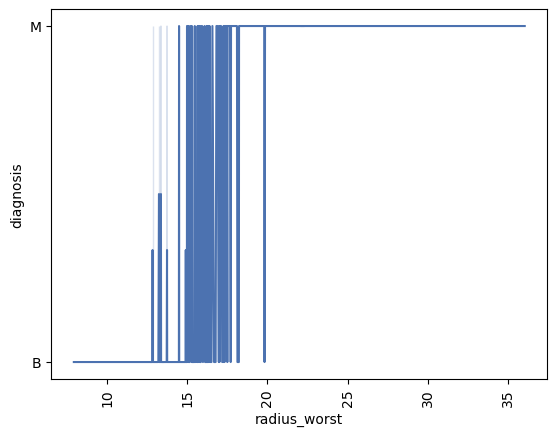

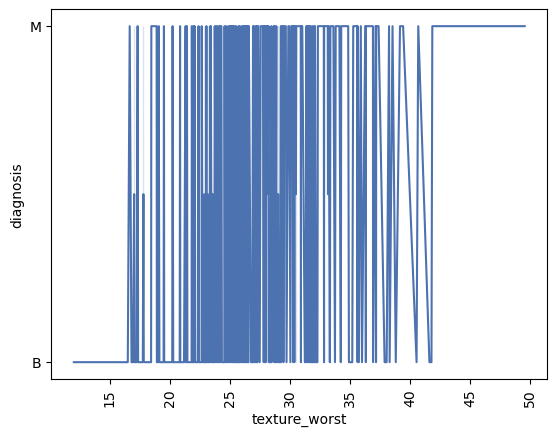

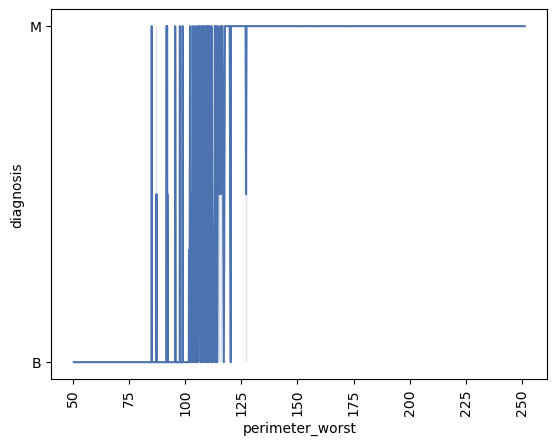

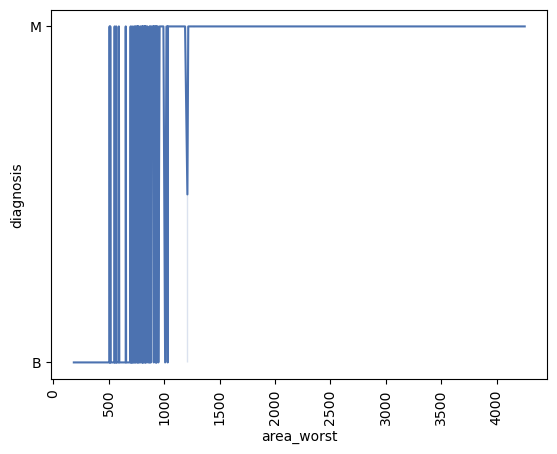

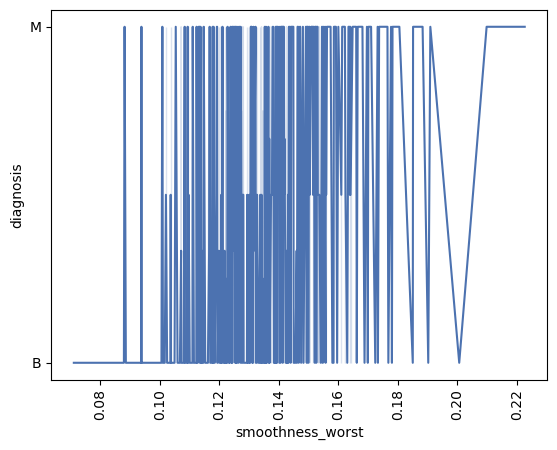

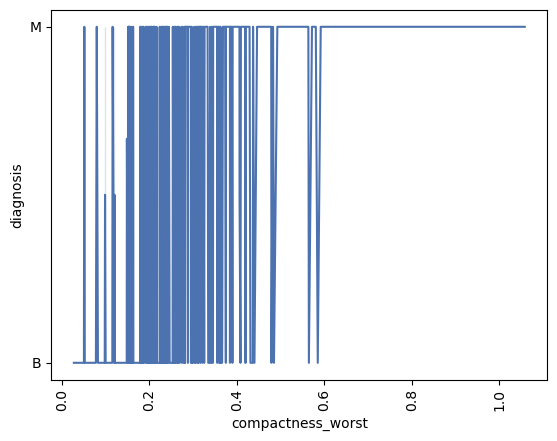

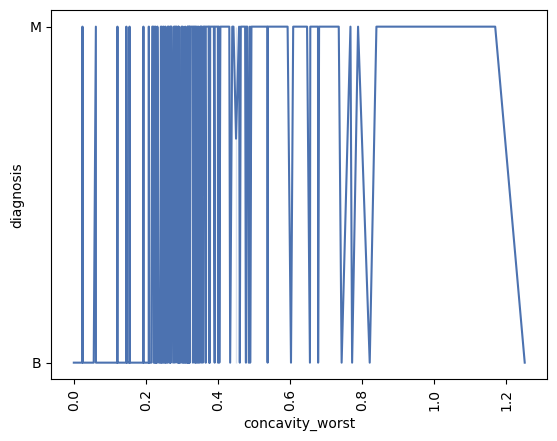

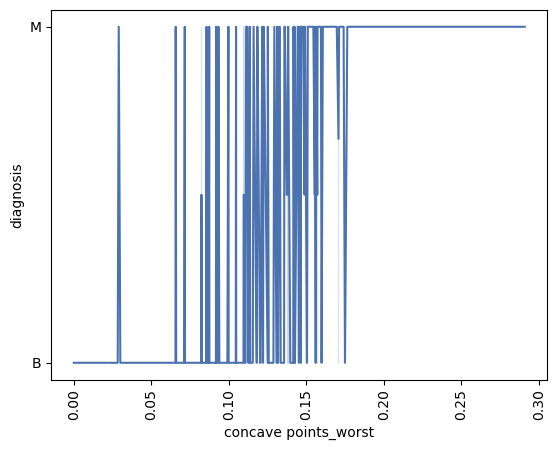

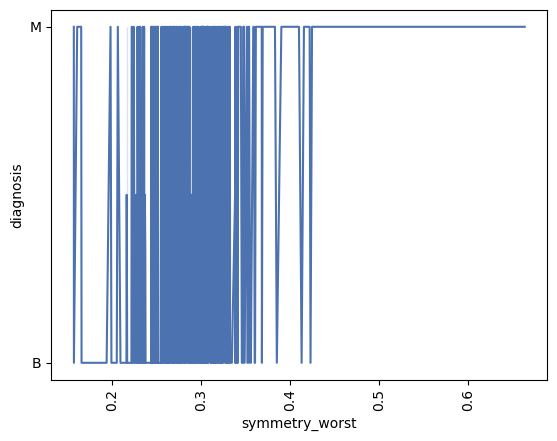

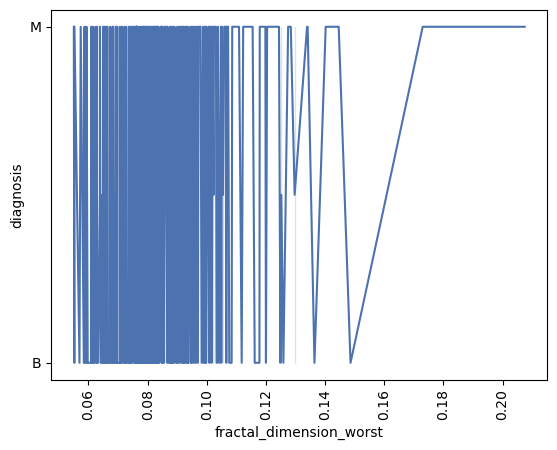

In [59]:
#lets plot Line plot for all columns for checking relation
#Lets plot Rel Plot for checking the relation between feature and label
for i in data:
    plt.figure()
    sns.lineplot(x=data[i],y=data['diagnosis'])
    plt.xticks(rotation=90)
    plt.show()


    Here we can see that most of the columns follow some relation. and maybe it seems to be go to Data Preprocessing Steps.

# Preprocessing Steps

In [60]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                
842302          17.990         10.38          122.80     1001.0   
842517          20.570         17.77          132.90     1326.0   
84300903        19.690         21.25          130.00     1203.0   
84348301        11.420         20.38           77.58      386.1   
84358402        20.290         14.34          135.10     1297.0   
843786          12.450         15.70           82.57      477.1   
844359          18.250         19.98          119.60     1040.0   
84458202        13.710         20.83           90.20      577.9   
844981          13.000         21.82           87.50      519.8   
84501001        12.460         24.04           83.97      475.9   
845636          16.020         23.24          102.70      797.8   
84610002        15.780         17.89          103.60      781.0   
846226          19.170         24.80          132.40     1123.0   
846381          15.850         23.95          103.70      782.7   
84667401        13.730         22.61           93.60      578.3   
84799002        14.540         27.54           96.73      658.8   
848406          14.680         20.13           94.74      684.5   
84862001        16.130         20.68          108.10      798.8   
849014          19.810         22.15          130.00     1260.0   
8510426         13.540         14.36           87.46      566.3   
8510653         13.080         15.71           85.63      520.0   
8510824          9.504         12.44           60.34      273.9   
8511133         15.340         14.26          102.50      704.4   
851509          21.160         23.04          137.20     1404.0   
852552          16.650         21.38          110.00      904.6   
852631          17.140         16.40          116.00      912.7   
852763          14.580         21.53           97.41      644.8   
852781          18.610         20.25          122.10     1094.0   
852973          15.300         25.27          102.40      732.4   
853201          17.570         15.05          115.00      955.1   
853401          18.630         25.11          124.80     1088.0   
853612          11.840         18.70           77.93      440.6   
85382601        17.020         23.98          112.80      899.3   
854002          19.270         26.47          127.90     1162.0   
854039          16.130         17.88          107.00      807.2   
854253          16.740         21.59          110.10      869.5   
854268          14.250         21.72           93.63      633.0   
854941          13.030         18.42           82.61      523.8   
855133          14.990         25.20           95.54      698.8   
855138          13.480         20.82           88.40      559.2   
855167          13.440         21.58           86.18      563.0   
855563          10.950         21.35           71.90      371.1   
855625          19.070         24.81          128.30     1104.0   
856106          13.280         20.28           87.32      545.2   
85638502        13.170         21.81           85.42      531.5   
857010          18.650         17.60          123.70     1076.0   
85713702         8.196         16.84           51.71      201.9   
85715           13.170         18.66           85.98      534.6   
857155          12.050         14.63           78.04      449.3   
857156          13.490         22.30           86.91      561.0   
857343          11.760         21.60           74.72      427.9   
857373          13.640         16.34           87.21      571.8   
857374          11.940         18.24           75.71      437.6   
857392          18.220         18.70          120.30     1033.0   
857438          15.100         22.02           97.26      712.8   
85759902        11.520         18.75           73.34      409.0   
857637          19.210         18.57          125.50     1152.0   
857793          14.710         21.59           95.55      

In [61]:
#Lets Remove Outliers
import numpy as np
from scipy.stats import zscore

In [64]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Remove Outliers

In [66]:
features = data[["perimeter_mean","area_mean","radius_se","texture_se","perimeter_se","area_se", "concavity_se","radius_worst","texture_worst", "perimeter_worst","area_worst"]]

In [67]:
# Using zscore to remove outliers

z=np.abs(zscore(features))

z

perimeter_mean  area_mean  radius_se  texture_se  perimeter_se  \
id                                                                          
842302           1.269934   0.984375   2.489734    0.565265      2.833031   
842517           1.685955   1.908708   0.499255    0.876244      0.263327   
84300903         1.566503   1.558884   1.228676    0.780083      0.850928   
84348301         0.592687   0.764464   0.326373    0.110409      0.286593   
84358402         1.776573   1.826229   1.270543    0.790244      1.273189   
843786           0.387148   0.505650   0.255070    0.592662      0.321304   
844359           1.138125   1.095295   0.149883    0.804940      0.155410   
84458202         0.072867   0.218965   0.643623    0.290561      0.490051   
844981           0.184080   0.384207   0.356850    0.389818      0.227743   
84501001         0.329482   0.509063   0.388250    0.693345      0.409420   
845636           0.442011   0.406453   0.092656    0.054164      0.198042   
84610002         0.479082   0.358672   0.363187    0.420843      0.345502   
846226           1.665360   1.331355   1.986249    4.265788      4.061202   
846381           0.483201   0.363507   0.006757    0.251928      0.018287   
84667401         0.067180   0.217827   0.696838    0.086823      0.398529   
84799002         0.196105   0.011123   0.126943    0.333573      0.006406   
848406           0.114137   0.084216   0.243723    0.041996      0.162836   
84862001         0.664438   0.409297   0.592011    0.261000      0.489061   
849014           1.566503   1.720997   1.274152    0.362603      1.484567   
8510426          0.185728   0.251957   0.488225    0.776999      0.400014   
8510653          0.261106   0.383638   0.793925    0.851206      0.734160   
8510824          1.302806   1.083572   0.461517    0.435539      0.473774   
8511133          0.433773   0.140814   0.121370    0.920332      0.256397   
851509           1.863073   2.130548   1.034140    0.163025      0.711330   
852552           0.742699   0.710203   1.449560    0.571797      1.281605   
852631           0.989840   0.733241   2.312883    0.436991      2.183056   
852763           0.224115   0.028694   0.543807    0.423928      0.374272   
852781           1.241101   1.248876   1.615944    1.146931      1.369225   
852973           0.429654   0.220449   0.122092    0.371675      0.312830   
853201           0.948650   0.853831   0.704258    0.715493      0.885580   
853401           1.352314   1.231812   1.535820    0.452038      1.340514   
853612           0.578271   0.609460   0.279093    0.339016      0.301444   
85382601         0.858032   0.695130   0.706423    0.328662      0.560840   
854002           1.480004   1.442275   0.543648    1.107935      0.327681   
854039           0.619129   0.433188   0.256875    0.963695      0.338135   
854253           0.746818   0.610375   0.203299    0.539139      0.070265   
854268           0.068416   0.062255   0.430117    0.358974      0.103491   
854941           0.385500   0.372831   0.798617    2.041403      0.839601   
855133           0.147089   0.124887   2.919230    1.761994      2.579575   
855138           0.147009   0.272150   0.693589    1.134788      0.653965   
855167           0.238451   0.261342   0.601554    0.708235      0.640599   
855563           0.826648   0.807125   0.608412    0.383092      0.516841   
855625           1.496480   1.277317   2.078645    0.814906      2.952333   
856106           0.191495   0.311967   0.125500    0.711138      0.217348   
85638502         0.269756   0.350931   0.762886    1.096868      0.758416   
857010           1.307005   1.197683   0.807481    1.004336      0.706379   
85713702         1.658278   1.288347   0.898232    0.472008      0.877224   
85715            0.246689   0.342115   0.426147    0.586311      0.479714   
857155           0.573740   0.584717   0.510963    0.884408      0.503970   
857156           0.208383   0.267030   0.618518    0.247017      0.559909   
857343 

In [68]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            M       17.990         10.38          122.80     1001.0   
842517            M       20.570         17.77          132.90     1326.0   
84300903          M       19.690         21.25          130.00     1203.0   
84348301          M       11.420         20.38           77.58      386.1   
84358402          M       20.290         14.34          135.10     1297.0   
843786            M       12.450         15.70           82.57      477.1   
844359            M       18.250         19.98          119.60     1040.0   
84458202          M       13.710         20.83           90.20      577.9   
844981            M       13.000         21.82           87.50      519.8   
84501001          M       12.460         24.04           83.97      475.9   
845636            M       16.020         23.24          102.70      797.8   
84610002          M       15.780         17.89          103.60      781.0   
846381            M       15.850         23.95          103.70      782.7   
84667401          M       13.730         22.61           93.60      578.3   
84799002          M       14.540         27.54           96.73      658.8   
848406            M       14.680         20.13           94.74      684.5   
84862001          M       16.130         20.68          108.10      798.8   
849014            M       19.810         22.15          130.00     1260.0   
8510426           B       13.540         14.36           87.46      566.3   
8510653           B       13.080         15.71           85.63      520.0   
8510824           B        9.504         12.44           60.34      273.9   
8511133           M       15.340         14.26          102.50      704.4   
852552            M       16.650         21.38          110.00      904.6   
852631            M       17.140         16.40          116.00      912.7   
852763            M       14.580         21.53           97.41      644.8   
852781            M       18.610         20.25          122.10     1094.0   
852973            M       15.300         25.27          102.40      732.4   
853201            M       17.570         15.05          115.00      955.1   
853401            M       18.630         25.11          124.80     1088.0   
853612            M       11.840         18.70           77.93      440.6   
85382601          M       17.020         23.98          112.80      899.3   
854002            M       19.270         26.47          127.90     1162.0   
854039            M       16.130         17.88          107.00      807.2   
854253            M       16.740         21.59          110.10      869.5   
854268            M       14.250         21.72           93.63      633.0   
854941            B       13.030         18.42           82.61      523.8   
855133            M       14.990         25.20           95.54      698.8   
855138            M       13.480         20.82           88.40      559.2   
855167            M       13.440         21.58           86.18      563.0   
855563            M       10.950         21.35           71.90      371.1   
855625            M       19.070         24.81          128.30     1104.0   
856106            M       13.280         20.28           87.32      545.2   
85638502          M       13.170         21.81           85.42      531.5   
857010            M       18.650         17.60          123.70     1076.0   
85713702          B        8.196         16.84           51.71      201.9   
85715             M       13.170         18.66           85.98      534.6   
857155            B       12.050         14.63           78.04      449.3   
857156            B       13.490         22.30           86.91      561.0   
857343            B       11.760         21.60           74.72      427.9   
857373            B       13.640         16.34           87.21      571.8   
857374

In [70]:
# Shape of original dataset
data.shape

(569, 31)

In [71]:
#After Removing Outliers
new_df.shape

(536, 31)

In [72]:
# Checking the the data loss
data_loss = (569-536)/569*100
data_loss

5.799648506151142

Here we loss 5.799 % Data

# ii) IQR (Inter Quantile Range) method

In [74]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [75]:
df1.shape

(462, 31)

In [76]:
# Checking the the data loss
data_loss = (569-462)/569*100
data_loss

18.804920913884008

So, in IQR Method we can see that we lost out 18.80 % data . lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Method.

# Encoding the categorical columns using Label Encoding

In [77]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['diagnosis']


In [78]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [79]:
new_df[categorical_col]

diagnosis
id                  
842302             1
842517             1
84300903           1
84348301           1
84358402           1
843786             1
844359             1
84458202           1
844981             1
84501001           1
845636             1
84610002           1
846381             1
84667401           1
84799002           1
848406             1
84862001           1
849014             1
8510426            0
8510653            0
8510824            0
8511133            1
852552             1
852631             1
852763             1
852781             1
852973             1
853201             1
853401             1
853612             1
85382601           1
854002             1
854039             1
854253             1
854268             1
854941             0
855133             1
855138             1
855167             1
855563             1
855625             1
856106             1
85638502           1
857010             1
85713702           0
85715              1
857155             0
857156             0
857343             0
857373             0
857374             0
857392             1
857438             1
85759902           0
857637             1
857793             1
857810             0
858477             0
858970             0
858981             0
858986             1
859196             0
85922302           1
859283             1
859464             0
859465             0
859487             0
859575             1
859711             0
859717             1
859983             1
8610175            0
8610404            1
8610629            0
8610637            1
8610862            1
8610908            0
861103             0
8611161            0
8612080            0
8612399            1
86135501           1
86135502           1
861597             0
861598             0
861648             0
861799             1
861853             0
862009             0
862028             1
86208              1
86211              0
862261             0
862485             0
862548             1
862717             1
862722             0
862965             0
862980             0
862989             0
863030             1
863031             0
863270             0
864018             0
864033             0
86408              0
864292             0
864496             0
864685             0
864726             0
864729             1
864877             1
865128             1
865137             0
86517              1
865432             0
865468             0
86561              0
866083             1
866203             1
866458             0
866674             1
866714             0
8670               1
86730502           1
867387             0
867739             1
868202             1
868223             0
868682             0
868871             0
868999             0
869104             1
869218             0
869224             0
869254             0
869476             0
869691             1
86973701           0
86973702           0
869931             0
871001501          0
871001502          0
87106              0
8711002            0
8711003            0
8711202            1
8711216            0
871122             0
871149             0
8711561            0
8711803            1
871201             1
8712064            0
8712289            1
8712291            0
87127              0
8712729            1
8712766            1
8712853            0
87139402           0
87163              1
87164              1
871641             0
871642             0
872113             0
872608             0
87281702           1
873357             0
873586             0
873593             1
873701             1
873843             0
873885             1
874158             0
874217             1
874373             0
874662             0
874839             0
874858             1
875093             0
875263             1
87556202           1
875878             0
875938             1
877159             1
877486             1
877500             1
877501             0


# Correlation between the target variable and features using HEAT map

In [80]:
# Checking the correlation
cor = new_df.corr()
cor

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.729066      0.411191        0.745318   
radius_mean               0.729066     1.000000      0.318895        0.997649   
texture_mean              0.411191     0.318895      1.000000        0.326661   
perimeter_mean            0.745318     0.997649      0.326661        1.000000   
area_mean                 0.731258     0.991929      0.325291        0.990450   
smoothness_mean           0.337741     0.113346     -0.024376        0.153419   
compactness_mean          0.594656     0.469130      0.238364        0.523892   
concavity_mean            0.740268     0.674929      0.329406        0.717960   
concave points_mean       0.789303     0.796276      0.293817        0.828082   
symmetry_mean             0.340990     0.148852      0.098303        0.185382   
fractal_dimension_mean    0.004113    -0.333979     -0.070086       -0.282186   
radius_se                 0.609487     0.645084      0.298963        0.658837   
texture_se               -0.004226    -0.123627      0.400024       -0.115954   
perimeter_se              0.603390     0.640752      0.311457        0.661782   
area_se                   0.678994     0.786584      0.312676        0.796955   
smoothness_se            -0.103469    -0.320372     -0.008694       -0.299587   
compactness_se            0.293898     0.180035      0.211371        0.226357   
concavity_se              0.377936     0.300344      0.250326        0.342542   
concave points_se         0.433650     0.414776      0.197721        0.446811   
symmetry_se              -0.011278    -0.135786      0.034037       -0.112763   
fractal_dimension_se      0.093821    -0.060045      0.069550       -0.020384   
radius_worst              0.787008     0.971404      0.341569        0.973082   
texture_worst             0.462014     0.297844      0.908109        0.306758   
perimeter_worst           0.795354     0.963893      0.351953        0.971287   
area_worst                0.774453     0.952375      0.338271        0.954668   
smoothness_worst          0.415922     0.088103      0.076955        0.123938   
compactness_worst         0.590352     0.401410      0.284065        0.448043   
concavity_worst           0.692013     0.551400      0.332046        0.592139   
concave points_worst      0.792931     0.733250      0.297058        0.764122   
symmetry_worst            0.442251     0.202151      0.146574        0.231036   
fractal_dimension_worst   0.349658     0.025107      0.134042        0.072708   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.731258         0.337741          0.594656   
radius_mean               0.991929         0.113346          0.469130   
texture_mean              0.325291        -0.024376          0.238364   
perimeter_mean            0.990450         0.153419          0.523892   
area_mean                 1.000000         0.116343          0.466902   
smoothness_mean           0.116343         1.000000          0.660594   
compactness_mean          0.466902         0.660594          1.000000   
concavity_mean            0.684455         0.509922          0.886589   
concave points_mean       0.802219         0.537696          0.821638   
symmetry_mean             0.157741         0.550329          0.598746   
fractal_dimension_mean   -0.310618         0.623681          0.579020   
radius_se                 0.677979         0.279842          0.498862   
texture_se               -0.097987         0.094967          0.023925   
perimeter_se              0.671950         0.276277          0.560878   
area_se                   0.818121         0.236015          0.514700   
smoothness_se            -0.271498         0.326617          0.115987   
compactness_se            0.187167         0.286236          0.732224   
concavity_se              0.311719         0.270034          0.696663   
concave points_se         0.418311         0.

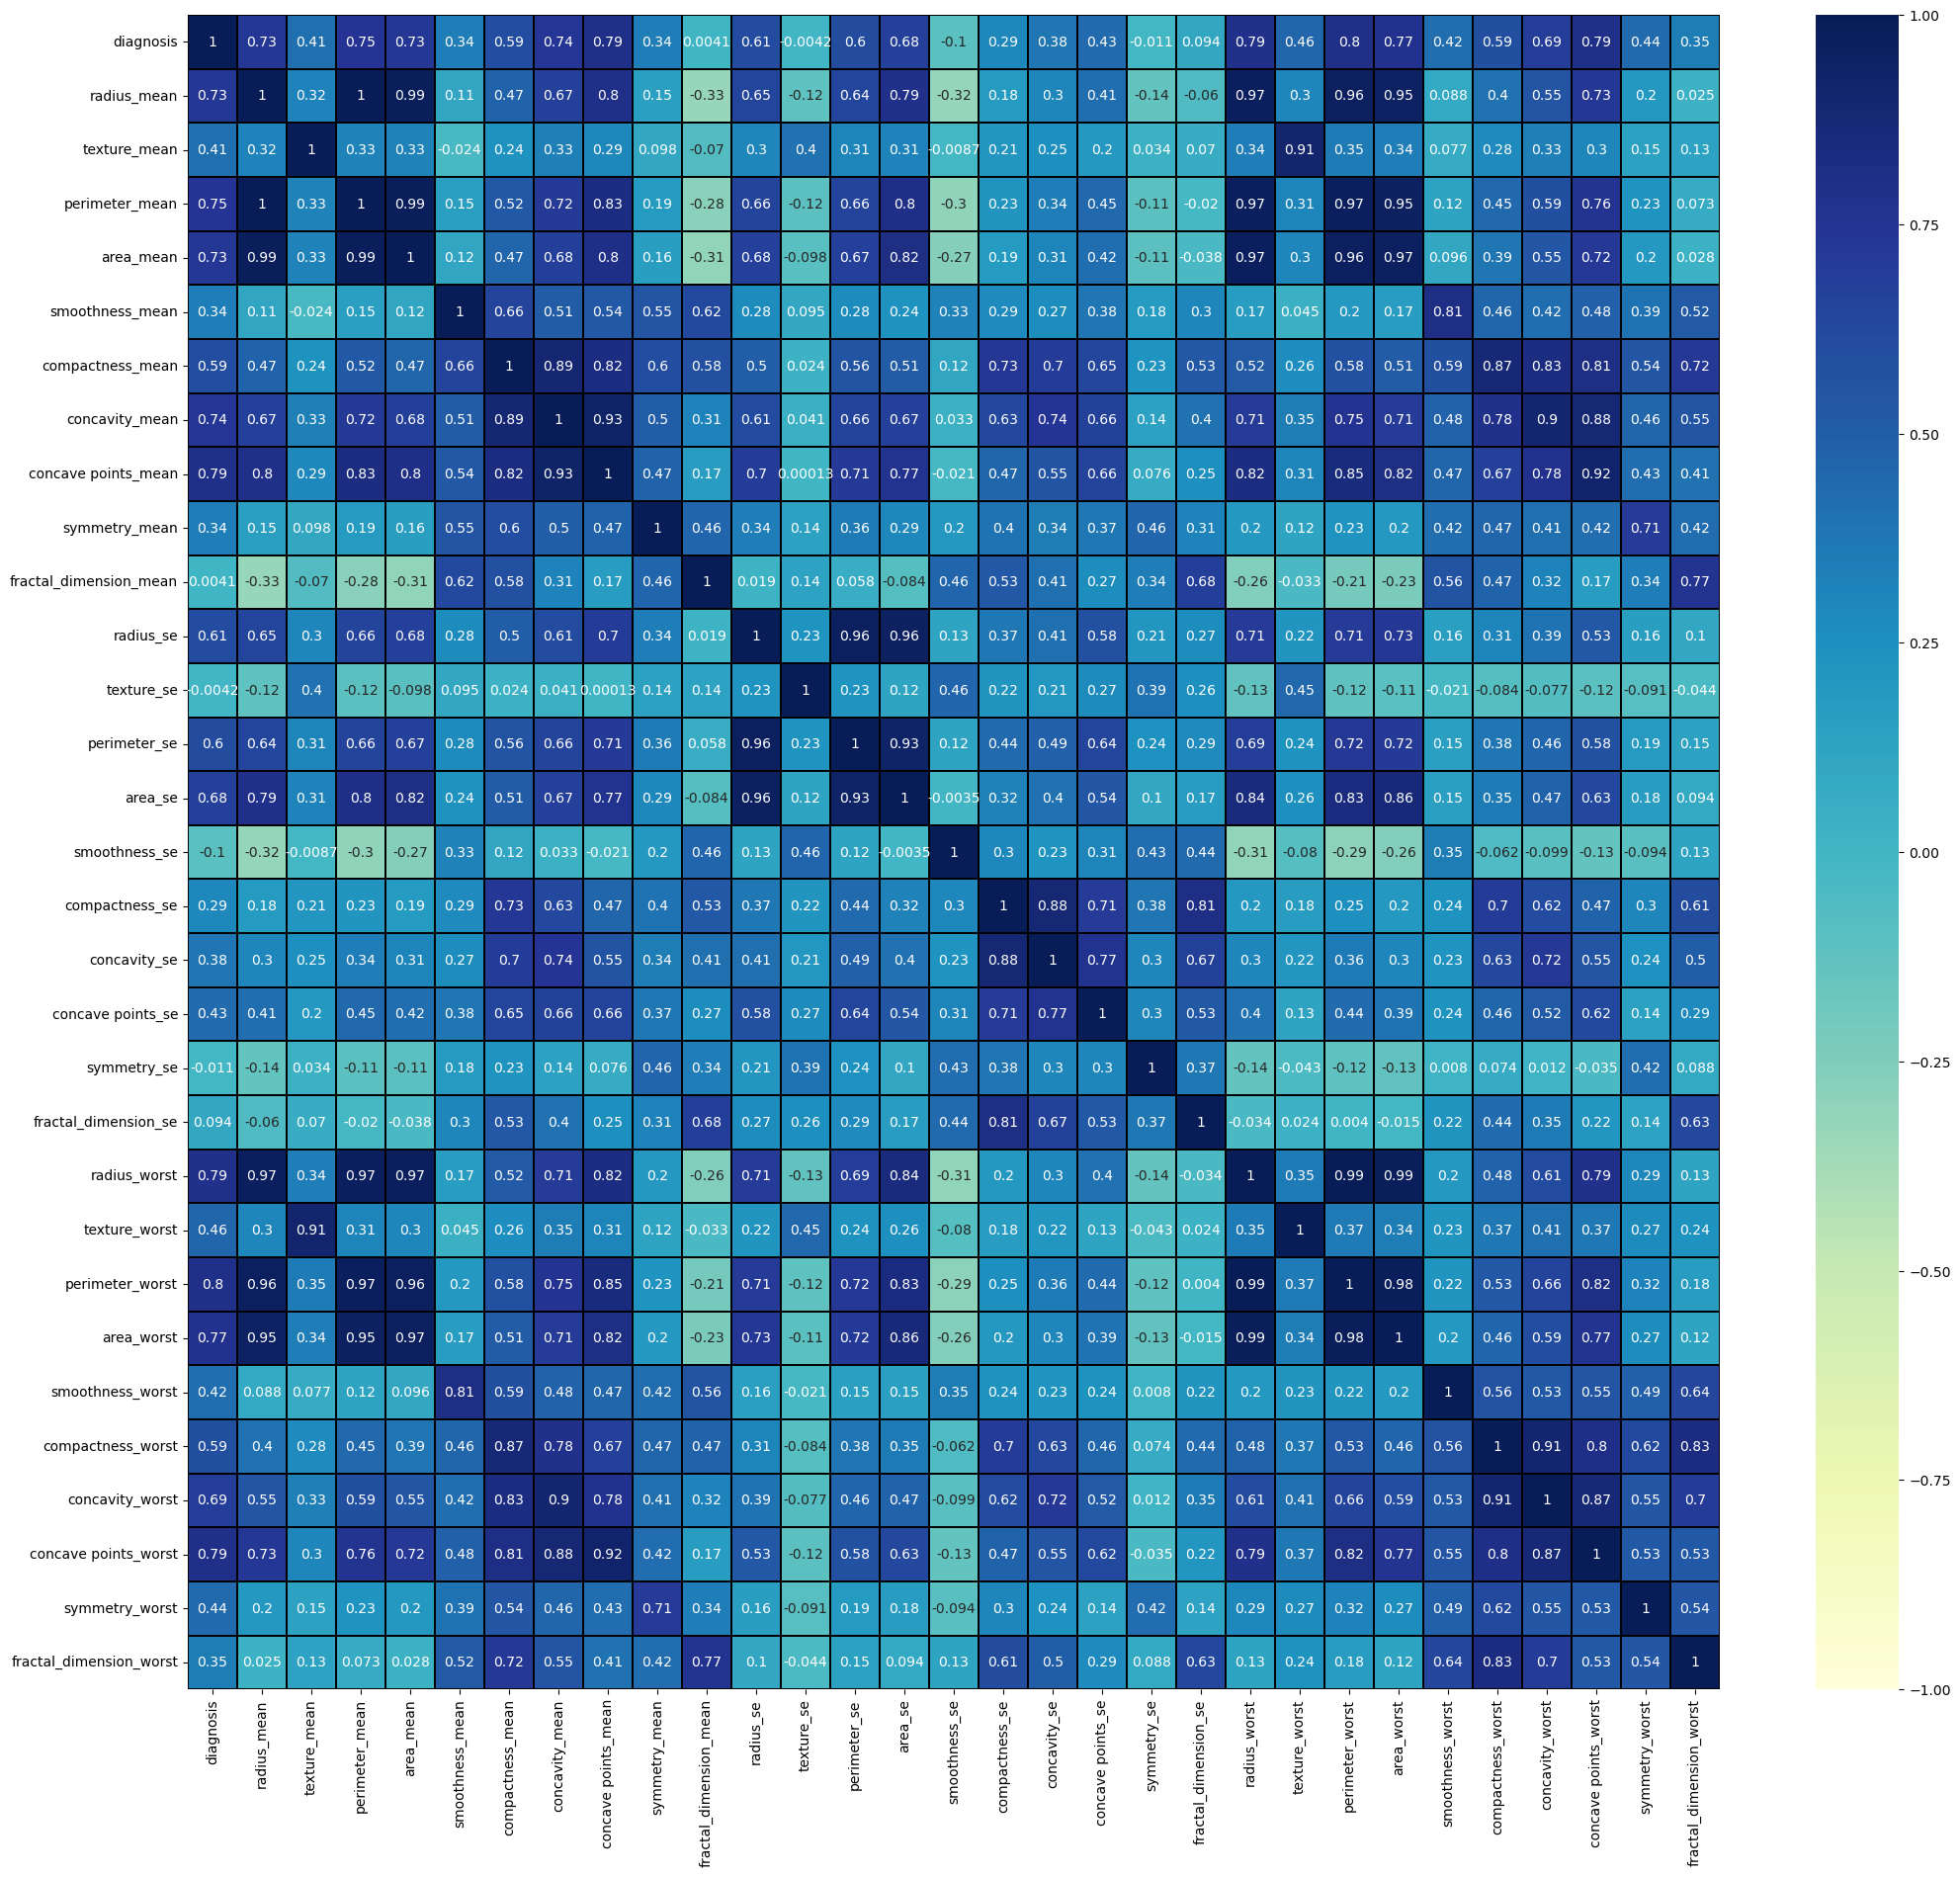

In [82]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

# Visualizing the correlation between label(y) and features using bar plot

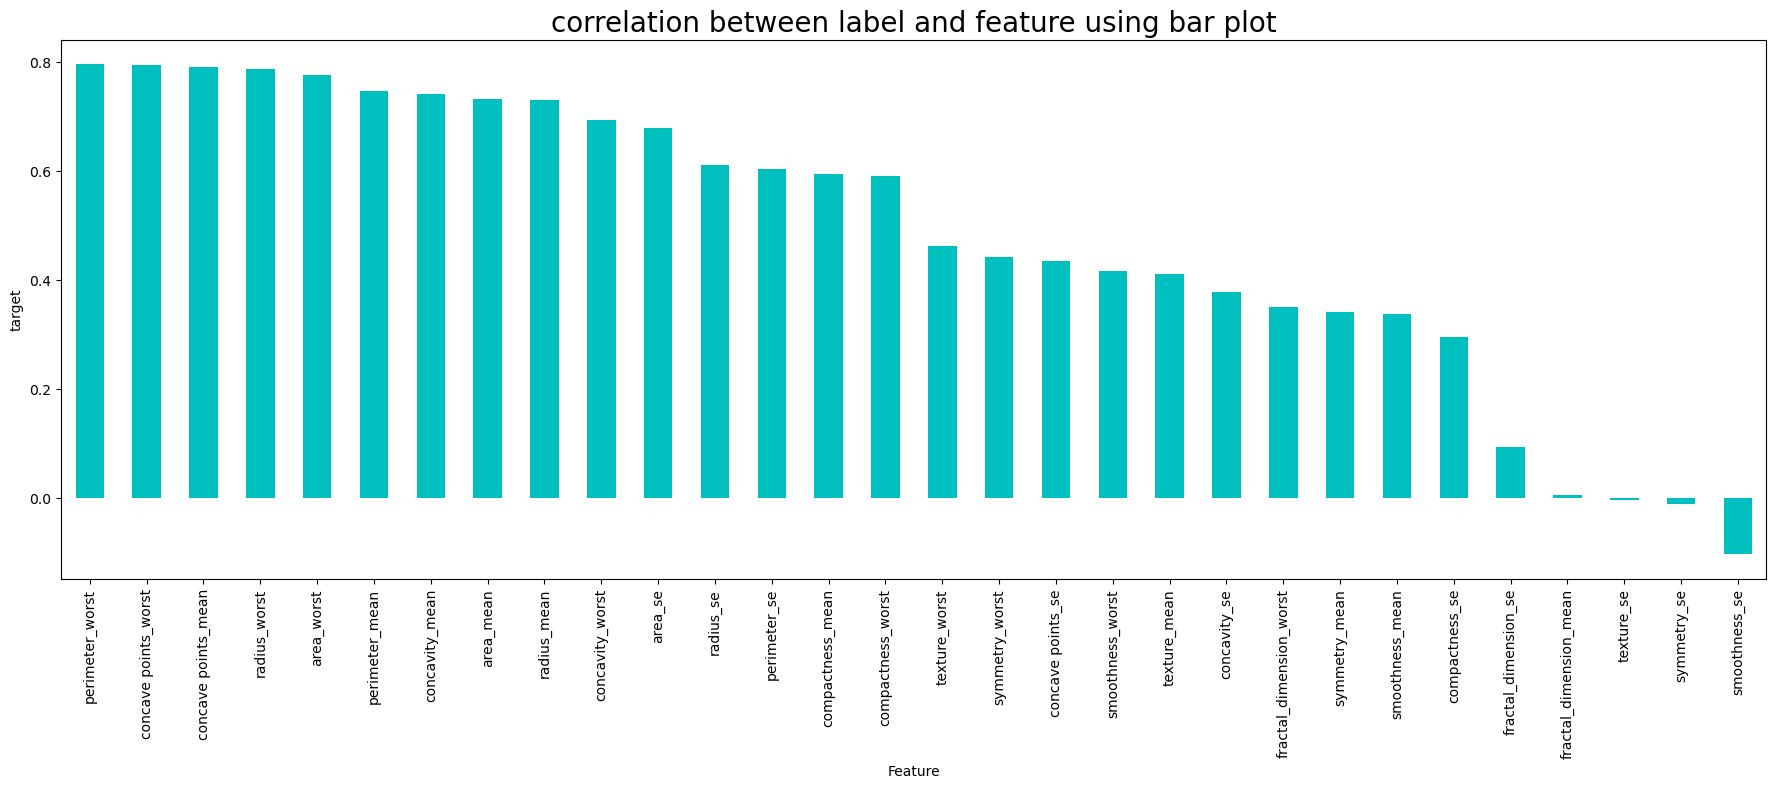

In [85]:
plt.figure(figsize=(22,7))
new_df.corr()['diagnosis'].sort_values(ascending=False).drop(['diagnosis']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

So, Here we can see that most of the columns are Positively related only 2 Columns are Negatively Related

# Model Building

In [88]:
x = new_df.drop("diagnosis", axis=1)
y = new_df["diagnosis"]

In [89]:
# Checking skewness after using yeo-johnson ethod
x.skew()

radius_mean                0.667617
texture_mean               0.463930
perimeter_mean             0.707131
area_mean                  1.101680
smoothness_mean            0.452762
compactness_mean           1.187277
concavity_mean             1.250101
concave points_mean        1.033634
symmetry_mean              0.753223
fractal_dimension_mean     1.297985
radius_se                  1.518713
texture_se                 0.795336
perimeter_se               1.690993
area_se                    1.872282
smoothness_se              1.604964
compactness_se             1.959790
concavity_se               1.336579
concave points_se          0.819814
symmetry_se                2.365748
fractal_dimension_se       3.287204
radius_worst               0.845648
texture_worst              0.332848
perimeter_worst            0.868241
area_worst                 1.272819
smoothness_worst           0.483835
compactness_worst          1.596339
concavity_worst            1.135504
concave points_worst       0

Here i am setting threshold for +/- 0.5... Lets do something to convert all column in Normally Distributed. 

In [115]:
skew=['area_mean','compactness_mean','concavity_mean','concave points_mean','fractal_dimension_mean','radius_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','symmetry_se','fractal_dimension_se','area_worst','compactness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']

In [121]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [122]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

area_mean  compactness_mean  concavity_mean  concave points_mean  \
id                                                                           
842302     1.264469          2.247707        1.963533             1.942116   
842517     1.846626         -0.343192        0.388011             0.924337   
84300903   1.647009          1.249217        1.520307             1.783643   
84348301  -0.840196          2.278798        1.753317             1.529588   
84358402   1.801462          0.840589        1.524059             1.517668   

          fractal_dimension_mean  radius_se  perimeter_se   area_se  \
id                                                                    
842302                  1.945096   2.041767      2.208518  2.078406   
842517                 -0.969018   1.085703      0.841882  1.423002   
84300903               -0.289365   1.600351      1.361525  1.661231   
84348301                2.792109   0.912247      0.867339  0.109824   
84358402               -0.513432   1.622034      1.623642  1.665350   

          smoothness_se  compactness_se  concavity_se  symmetry_se  \
id                                                                   
842302        -0.011276        1.527431      1.251897     1.412251   
842517        -0.630295       -0.772277     -0.442266    -1.039057   
84300903      -0.132133        1.197282      0.666080     0.606494   
84348301       1.013528        2.051652      1.341179     2.419773   
84358402       1.588739        0.307490      1.349267    -0.212533   

          fractal_dimension_se  area_worst  compactness_worst  \
id                                                              
842302                1.407278    1.848691           1.959366   
842517                0.229704    1.800458          -0.261262   
84300903              0.796403    1.590604           1.255164   
84348301              2.010872   -0.424209           2.273495   
84358402              1.033087    1.460088          -0.092016   

          concavity_worst  symmetry_worst  fractal_dimension_worst  
id                                                                  
842302           1.792670        2.163957                 1.736779  
842517           0.126507       -0.125401                 0.556560  
84300903         1.075371        1.225024                 0.472900  
84348301         1.738820        3.106397                 2.504546  
84358402         0.886410       -0.981897                -0.267933

In [123]:
# Checking skewness after using yeo-johnson ethod
x.skew()

radius_mean                0.667617
texture_mean               0.463930
perimeter_mean             0.707131
area_mean                  0.003557
smoothness_mean            0.452762
compactness_mean           0.103828
concavity_mean             0.214748
concave points_mean        0.196108
symmetry_mean              0.753223
fractal_dimension_mean     0.029380
radius_se                  0.159929
texture_se                 0.795336
perimeter_se               0.068694
area_se                    0.061543
smoothness_se              0.090627
compactness_se             0.184455
concavity_se               0.100158
concave points_se          0.819814
symmetry_se                0.120194
fractal_dimension_se       0.193592
radius_worst               0.845648
texture_worst              0.332848
perimeter_worst            0.868241
area_worst                 0.019716
smoothness_worst           0.483835
compactness_worst          0.097567
concavity_worst            0.090165
concave points_worst       0

So, Here we can see that ..  all our data comes in our range except 2 Columns but we consider as a normal distrubution..

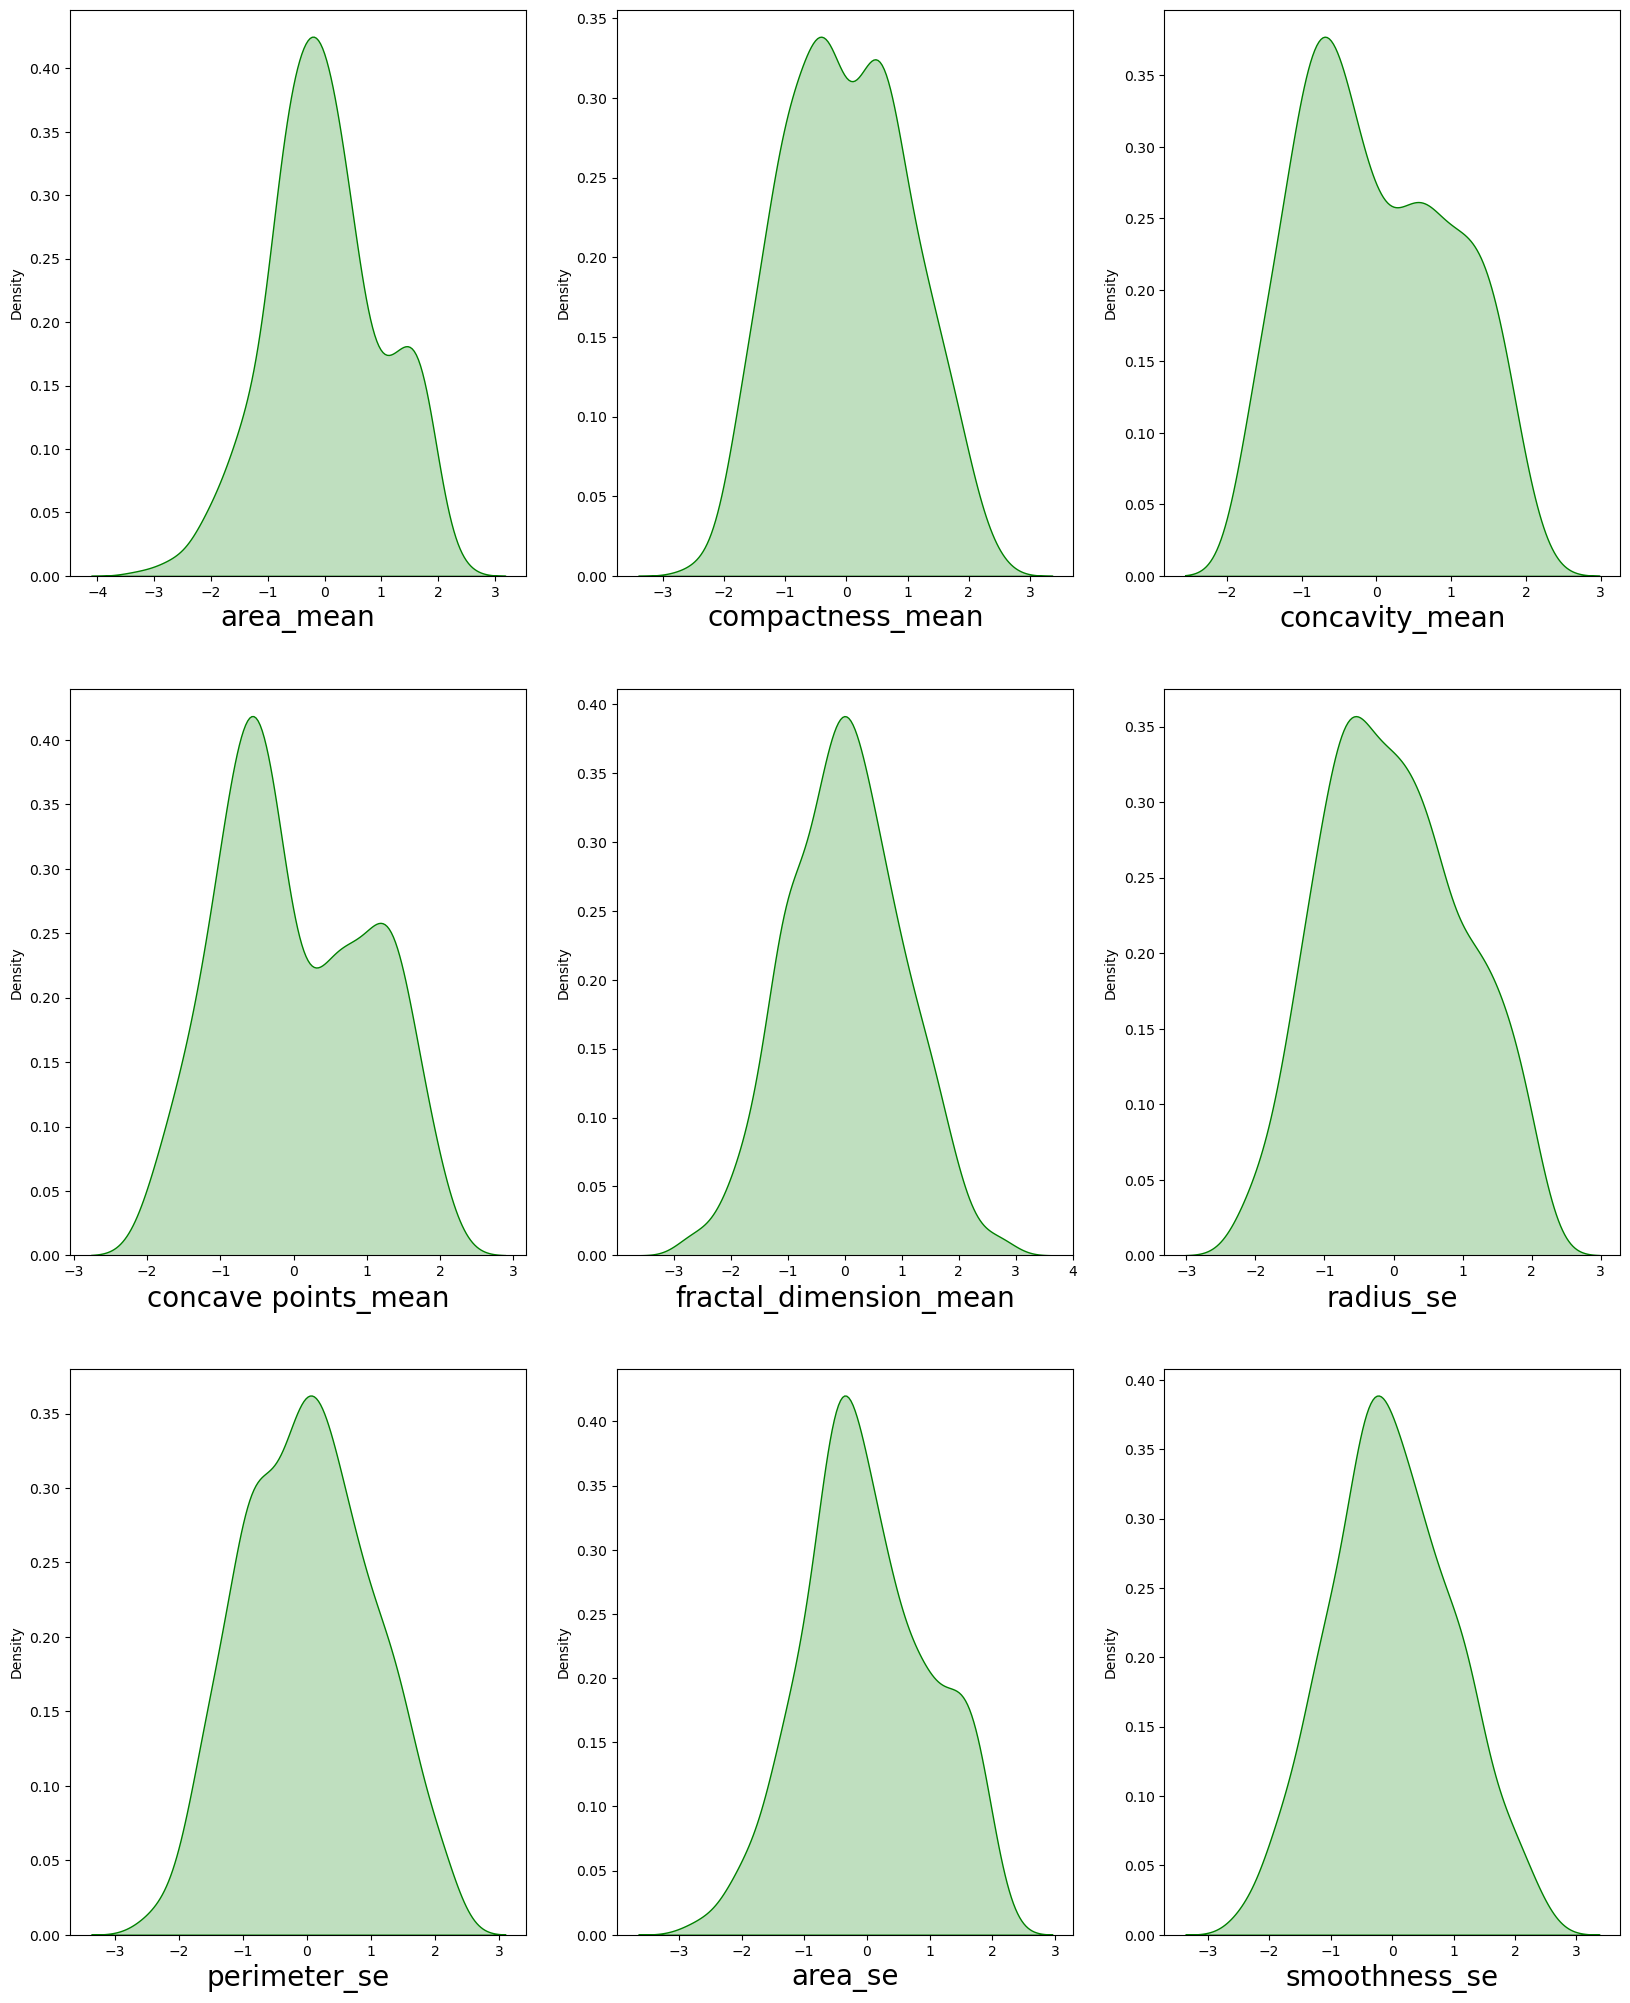

In [124]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

So, Here we can see that we got the almost normally distributed

In [126]:
#Resolving the class imbalance issue in label column
#Counter module to count each class 
from collections import Counter
Counter(data['diagnosis'])

Counter({'M': 212, 'B': 357})

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
x,y= oversample.fit_resample(x,y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [130]:
y.value_counts()

1    347
0    347
Name: diagnosis, dtype: int64

In [131]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.011082     -2.342096        1.194379   1.011490         1.563666   
1     1.784123     -0.456465        1.634368   1.578340        -0.964303   
2     1.520450      0.431491        1.508035   1.383972         0.902759   
3    -0.957477      0.209502       -0.775554  -1.037837         3.373649   
4     1.700227     -1.331663        1.730207   1.534363         0.204301   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          2.065544        1.694703             1.651651       2.246302   
1         -0.538774        0.142492             0.655909      -0.093461   
2          1.061883        1.258035             1.496610       0.897180   
3          2.096797        1.487597             1.248055       2.932427   
4          0.651138        1.261731             1.236393      -0.105025   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                1.974523  ...      1.846672      -1.554206         2.296491   
1               -0.971322  ...      1.761146      -0.480167         1.479280   
2               -0.284269  ...      1.449744      -0.105667         1.279729   
3                2.830760  ...     -0.449373       0.065685        -0.418992   
4               -0.510775  ...      1.223867      -1.670796         1.270226   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    1.570003          1.213229           1.788538         1.578018   
1    1.522970         -0.511477          -0.452249        -0.094341   
2    1.318336          0.413756           1.077944         0.858051   
3   -0.646361          3.351146           2.105519         1.523968   
4    1.191066          0.099356          -0.281466         0.668388   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.106741        2.100246                 1.654924  
1              0.894791       -0.245788                 0.463211  
2              1.764831        1.138069                 0.378736  
3              1.986157        3.066017                 2.430168  
4              0.536091       -1.123487                -0.369311  

[5 rows x 30 columns]

In [133]:
#Lets do PCA
from sklearn.decomposition import PCA

In [135]:
pca=PCA()
pca.fit_transform(x)

array([[ 7.36069207e+00,  1.83422593e+00, -1.35856946e+00, ...,
         1.69327381e-01, -1.10306047e-02, -2.02196376e-02],
       [ 2.21697276e+00, -3.92384526e+00, -5.24903997e-01, ...,
        -1.10529784e-01,  5.87050510e-03, -1.55613189e-02],
       [ 5.68211201e+00, -7.40632474e-01, -7.28528092e-02, ...,
        -7.71775940e-02,  2.06181207e-03,  5.50195246e-04],
       ...,
       [ 3.63007939e+00, -3.22943155e+00, -1.09812009e-02, ...,
        -6.67056657e-02, -3.47888891e-02, -3.15358429e-03],
       [ 7.38099199e-01,  7.82651535e-01,  5.84679539e-01, ...,
        -1.98972681e-02, -6.90784566e-03,  3.72813899e-03],
       [ 2.49694608e+00,  5.79939370e+00, -3.58520926e+00, ...,
        -2.39923619e-02, -2.87932975e-02, -3.31242359e-02]])

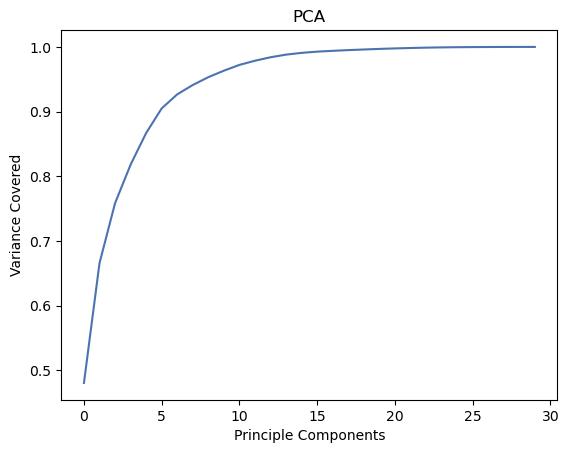

In [136]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [138]:
pca=PCA(n_components=13)
new_pump=pca.fit_transform(x)
princi_comp=pd.DataFrame(new_pump,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

Its work like feature . but it is component .

In [140]:
#Lets builds models with SV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load your data into X and y

best_state = 0
best_accuracy = 0
best_clf = None
best_cv_scores = None

for i in range(100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    # Create an SVM classifier and fit it to the training data
    clf = SVC()
    clf.fit(X_train, y_train)

    # Use the classifier to predict on the testing data and calculate the accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Keep track of the best random state and its corresponding accuracy and classifier
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_state = i
        best_clf = clf

    # Calculate cross-validation scores
    cv_scores = cross_val_score(clf, x, y, cv=10)
    if best_cv_scores is None or cv_scores.mean() > best_cv_scores.mean():
        best_cv_scores = cv_scores

print("Best random state:", best_state)
print("Best accuracy:", best_accuracy)
print("Cross-validation scores:", best_cv_scores)

# Evaluate the best classifier on the testing data
y_pred = best_clf.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Best random state: 80
Best accuracy: 1.0
Cross-validation scores: [0.97142857 0.98571429 0.97142857 0.97142857 0.98550725 0.98550725
 0.97101449 1.         1.         0.97101449]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        70

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Confusion matrix:
[[69  0]
 [ 0 70]]


In [141]:
#Lets try with SVM
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
#Lets builds models with Random Forest Classifier
best_state = 0
best_accuracy = 0
best_clf = None
best_cv_scores = None

for i in range(100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    
    clf.fit(X_train, y_train)

    # Use the classifier to predict on the testing data and calculate the accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Keep track of the best random state and its corresponding accuracy and classifier
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_state = i
        best_clf = clf

    # Calculate cross-validation scores
    cv_scores = cross_val_score(clf, x, y, cv=10)
    if best_cv_scores is None or cv_scores.mean() > best_cv_scores.mean():
        best_cv_scores = cv_scores

print("Best random state:", best_state)
print("Best accuracy:", best_accuracy)
print("Cross-validation scores:", best_cv_scores)

# Evaluate the best classifier on the testing data
y_pred = best_clf.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Best random state: 26
Best accuracy: 0.9928057553956835
Cross-validation scores: [0.97142857 0.97142857 0.97142857 0.98571429 1.         0.98550725
 0.98550725 1.         0.94202899 0.98550725]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.99      1.00      0.99        70

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139

Confusion matrix:
[[68  1]
 [ 0 70]]


In [142]:
#lets Try with KNN
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

#Lets builds models with Random Forest Classifier
best_state = 0
best_accuracy = 0
best_clf = None
best_cv_scores = None

for i in range(100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    
    clf.fit(X_train, y_train)

    # Use the classifier to predict on the testing data and calculate the accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Keep track of the best random state and its corresponding accuracy and classifier
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_state = i
        best_clf = clf

    # Calculate cross-validation scores
    cv_scores = cross_val_score(clf, x, y, cv=10)
    if best_cv_scores is None or cv_scores.mean() > best_cv_scores.mean():
        best_cv_scores = cv_scores

print("Best random state:", best_state)
print("Best accuracy:", best_accuracy)
print("Cross-validation scores:", best_cv_scores)

# Evaluate the best classifier on the testing data
y_pred = best_clf.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Best random state: 2
Best accuracy: 0.9928057553956835
Cross-validation scores: [0.97142857 1.         0.97142857 0.95714286 0.98550725 0.98550725
 0.98550725 1.         0.97101449 0.97101449]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.96      0.99      0.97        70

    accuracy                           0.97       139
   macro avg       0.97      0.97      0.97       139
weighted avg       0.97      0.97      0.97       139

Confusion matrix:
[[66  3]
 [ 1 69]]


In [147]:
#Lets try xgb
!pip install xgboost
import xgboost as xgb

clf=xgb.XGBClassifier()

#Lets builds models with Random Forest Classifier
best_state = 0
best_accuracy = 0
best_clf = None
best_cv_scores = None

for i in range(100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    
    clf.fit(X_train, y_train)

    # Use the classifier to predict on the testing data and calculate the accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Keep track of the best random state and its corresponding accuracy and classifier
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_state = i
        best_clf = clf

    # Calculate cross-validation scores
    cv_scores = cross_val_score(clf, x, y, cv=10)
    if best_cv_scores is None or cv_scores.mean() > best_cv_scores.mean():
        best_cv_scores = cv_scores

print("Best random state:", best_state)
print("Best accuracy:", best_accuracy)
print("Cross-validation scores:", best_cv_scores)

# Evaluate the best classifier on the testing data
y_pred = best_clf.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Best random state: 6
Best accuracy: 0.9928057553956835
Cross-validation scores: [0.97142857 0.97142857 0.95714286 0.97142857 0.98550725 1.
 0.97101449 1.         0.98550725 1.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        70

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139

Confusion matrix:
[[67  2]
 [ 0 70]]


# Model Selection
    So, Here i am going with SVM 

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)
cnn = SVC()
cnn.fit(X_train,y_train)

# Use the classifier to predict on the testing data and calculate the accuracy
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
# Evaluate the best classifier on the testing data
y_pred = best_clf.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        69

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

Confusion matrix:
[[70  0]
 [ 0 69]]


# Lets Do Hyperaparameter Tuning

In [185]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune and their possible values
param_grid = {'C':[5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

gridsearch=GridSearchCV(cnn,param_grid)

gridsearch.fit(X_train,y_train)



#Best Param
gridsearch.best_params_

{'C': 10, 'gamma': 0.02}

SVC model training and printing train and test score (post param update)

In [197]:
gridsearch=GridSearchCV(svc,param_grid)

gridsearch.fit(X_train,y_train)



#Best Param
gridsearch.best_params_

{'C': 10, 'gamma': 0.02}

In [198]:
cnn=SVC(C=10,gamma=0.02)
cnn.fit(X_train,y_train)


#call the function and pass dataset to check train and test_score

print_score(cnn,X_train,X_test,y_train,y_test,train=True)

print_score(cnn,X_train,X_test,y_train,y_test,train=False)

  =================Training Score==================  
Accuracy Score ==>  0.9945945945945946
 ====== Testing Score ======
Accuracy Score==>  1.0
Classification Report ==>                precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        69

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



In [166]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("  =================Training Score==================  ")
        print("Accuracy Score ==> ",accuracy_score(y_train,y_pred))
    elif train== False:
        pred=clf.predict(X_test)
        print(" ====== Testing Score ======")
        print("Accuracy Score==> ",accuracy_score(y_test,pred))
        print("Classification Report ==> ",classification_report(y_test,pred))

In [167]:
#call the function and pass dataset to check train and test_score

print_score(cnn,X_train,X_test,y_train,y_test,train=True)

print_score(cnn,X_train,X_test,y_train,y_test,train=False)

  =================Training Score==================  
Accuracy Score ==>  0.9873873873873874
 ====== Testing Score ======
Accuracy Score==>  1.0
Classification Report ==>                precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        69

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



So, Here now we can say that our model is not overfitted. Lets move foreward to plot ROC

In [209]:
pred=cnn.predict(X_test)

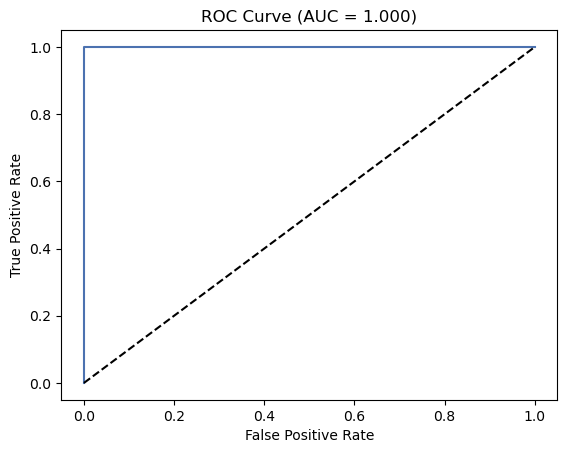

In [210]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.3f})'.format(auc))
plt.show()

In [214]:
import pickle
filename=('Pranathi Machine Learning Project ')
pickle.dump(cnn,open(filename,'wb'))

In [215]:
loaded_model=pickle.load(open('Pranathi Machine Learning Project ','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

100.0


In [217]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  545  546  \
predicted    1    1    1    0    0    0    1    0    1    0  ...  0.0  1.0   
original     1    0    1    0    0    1    1    0    1    0  ...  NaN  NaN   

           547  548  549  550  551  552  553  554  
predicted  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  
original   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 555 columns]

In [ ]:
#Intern at Pranathi
#Student of DataTrained- Saurav
#Date - 18- April - 2023
#Time - 13:55